# 프로젝트 개요

데이터 출처
* 서울 열린데이터 광장 (data.seoul.go.kr)

수집 데이터 내용
* 서울시 주민등록 인구 (동별) 통계
* 서울시 자치구 년도별 CCTV 설치 현황 

문제 인식
* 서울시의 cctv개수와 서울시 범죄율 간의 상관관계
* cctv 배치 기준 모호

분석 목적
* 서울시 cctv 설치 현황과 운영 파악 및 자치구 수요 수치화를 통한 cctv 우선 배치 및 선정

# 데이터 파일 불러오기

## csv

In [1]:
import pandas as pd
cctv_seoul = pd.read_csv('./data/cctv_in_seoul.csv', encoding='utf-8')
cctv_seoul

,기관명,소계,2013년 이전,2014년,2015년,2016년,2017년,2018년
0,강남구,"5,221",2455.0,430,546.0,765.0,577.0,448.0
1,강동구,"1,879",824.0,59,144.0,194.0,273.0,385.0
2,강북구,"1,265",472.0,74,145.0,254.0,1.0,319.0
3,강서구,"1,617",492.0,230,187.0,190.0,264.0,254.0
4,관악구,"3,985",905.0,487,609.0,619.0,694.0,671.0
5,광진구,"1,581",595.0,87,64.0,21.0,468.0,346.0
6,구로구,"3,227",1420.0,187,268.0,326.0,540.0,486.0
7,금천구,"1,634",286.0,101,382.0,136.0,199.0,530.0
8,노원구,"1,906",801.0,80,461.0,298.0,110.0,156.0
9,도봉구,858,271.0,185,59.0,155.0,117.0,71.0


In [2]:
cctv_seoul.dropna(inplace=True)
cctv_seoul

,기관명,소계,2013년 이전,2014년,2015년,2016년,2017년,2018년
0,강남구,"5,221",2455.0,430,546.0,765.0,577.0,448.0
1,강동구,"1,879",824.0,59,144.0,194.0,273.0,385.0
2,강북구,"1,265",472.0,74,145.0,254.0,1.0,319.0
3,강서구,"1,617",492.0,230,187.0,190.0,264.0,254.0
4,관악구,"3,985",905.0,487,609.0,619.0,694.0,671.0
5,광진구,"1,581",595.0,87,64.0,21.0,468.0,346.0
6,구로구,"3,227",1420.0,187,268.0,326.0,540.0,486.0
7,금천구,"1,634",286.0,101,382.0,136.0,199.0,530.0
8,노원구,"1,906",801.0,80,461.0,298.0,110.0,156.0
9,도봉구,858,271.0,185,59.0,155.0,117.0,71.0


### 컬럼

In [3]:
cctv_seoul.columns

Index(['기관명', '소계', '2013년 이전', '2014년', '2015년', '2016년', '2017년', '2018년'], dtype='object')

In [4]:
cctv_seoul.columns[0]

'기관명'

In [5]:
cctv_seoul.columns[1:3]

Index(['소계', '2013년 이전'], dtype='object')

In [6]:
cctv_seoul.columns[:]

Index(['기관명', '소계', '2013년 이전', '2014년', '2015년', '2016년', '2017년', '2018년'], dtype='object')

In [7]:
cctv_seoul.columns[-1]

'2018년'

### 이름 바꾸기

* 칼럼 이름 바꾸기

: df.columns = ['a', 'b']

: df.rename(columns = {'old_nm' : 'new_nm'), inplace = True)


* 인덱스 이름 바꾸기

: df.index = ['a', 'b']

: df.rename(index = {'old_nm': 'new_nm'), inplace = True)

inplace=True는 데이터 변수의 내용을 갱신하라는 의미

In [8]:
cctv_seoul.rename(columns={'지역구':'구별'}, inplace=True)
cctv_seoul

,기관명,소계,2013년 이전,2014년,2015년,2016년,2017년,2018년
0,강남구,"5,221",2455.0,430,546.0,765.0,577.0,448.0
1,강동구,"1,879",824.0,59,144.0,194.0,273.0,385.0
2,강북구,"1,265",472.0,74,145.0,254.0,1.0,319.0
3,강서구,"1,617",492.0,230,187.0,190.0,264.0,254.0
4,관악구,"3,985",905.0,487,609.0,619.0,694.0,671.0
5,광진구,"1,581",595.0,87,64.0,21.0,468.0,346.0
6,구로구,"3,227",1420.0,187,268.0,326.0,540.0,486.0
7,금천구,"1,634",286.0,101,382.0,136.0,199.0,530.0
8,노원구,"1,906",801.0,80,461.0,298.0,110.0,156.0
9,도봉구,858,271.0,185,59.0,155.0,117.0,71.0


## excel

In [9]:
pop_seoul = pd.read_excel('./data/population_in_seoul.xlsx', encoding='utf-8', thousands=',')
pop_seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2019.1/4,합계,4290922,10054979,4909387,5145592,9770216,4772134,4998082,284763,137253,147510,2.28,1436125
3,2019.1/4,종로구,73914,162913,78963,83950,152778,74536,78242,10135,4427,5708,2.07,26981
4,2019.1/4,중구,61800,135836,66720,69116,125942,61992,63950,9894,4728,5166,2.04,22421


### 불필요한 헤더 제거

##### 불필요한 hearder를 제거

In [10]:
pop_seoul = pd.read_excel('./data/population_in_seoul.xlsx', 
                          header = 2,
                          encoding='utf-8', 
                          thousands=',')
pop_seoul.head()

,기간,자치구,세대,계,남자,여자,계.1,남자.1,여자.1,계.2,남자.2,여자.2,세대당인구,65세이상고령자
0,2019.1/4,합계,4290922.0,10054979.0,4909387.0,5145592.0,9770216.0,4772134.0,4998082.0,284763.0,137253.0,147510.0,2.28,1436125.0
1,2019.1/4,종로구,73914.0,162913.0,78963.0,83950.0,152778.0,74536.0,78242.0,10135.0,4427.0,5708.0,2.07,26981.0
2,2019.1/4,중구,61800.0,135836.0,66720.0,69116.0,125942.0,61992.0,63950.0,9894.0,4728.0,5166.0,2.04,22421.0
3,2019.1/4,용산구,109413.0,245139.0,119597.0,125542.0,229168.0,110626.0,118542.0,15971.0,8971.0,7000.0,2.09,38049.0
4,2019.1/4,성동구,137247.0,314608.0,154011.0,160597.0,306404.0,150287.0,156117.0,8204.0,3724.0,4480.0,2.23,43076.0


### 필요한 컬럼만 선택

##### 필요한 컬럼만 선택

In [11]:
pop_seoul = pd.read_excel('./data/population_in_seoul.xlsx', 
                          header = 2,
                          usecols = 'B, D, G, J, N',
                          encoding='utf-8', 
                          thousands=',')
pop_seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10054979.0,9770216.0,284763.0,1436125.0
1,종로구,162913.0,152778.0,10135.0,26981.0
2,중구,135836.0,125942.0,9894.0,22421.0
3,용산구,245139.0,229168.0,15971.0,38049.0
4,성동구,314608.0,306404.0,8204.0,43076.0


### 컬럼 이름 변경

##### rename을 이용, 컬럼 이름 변경

In [12]:
pop_seoul.rename(columns={pop_seoul.columns[0] : '구별',
                          pop_seoul.columns[1] : '인구수',
                          pop_seoul.columns[2] : '한국인',
                          pop_seoul.columns[3] : '외국인',
                          pop_seoul.columns[4] : '고령자'},
                          inplace = True)
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10054979.0,9770216.0,284763.0,1436125.0
1,종로구,162913.0,152778.0,10135.0,26981.0
2,중구,135836.0,125942.0,9894.0,22421.0
3,용산구,245139.0,229168.0,15971.0,38049.0
4,성동구,314608.0,306404.0,8204.0,43076.0


# pandas 기초

In [13]:
import pandas as pd
import numpy as np

## Series : pandas의 데이터 유형 중 기초

In [14]:
s = pd.Series([1, 3, 5, np.nan, 6, 8]) # NaN(Not A Number)
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [15]:
s1 = pd.Series([10, 20, 30, 40, 50, 100])
s1

0     10
1     20
2     30
3     40
4     50
5    100
dtype: int64

## 날짜형 데이터

In [16]:
dates = pd.date_range('20200301', periods=6)
dates

DatetimeIndex(['2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
               '2020-03-05', '2020-03-06'],
              dtype='datetime64[ns]', freq='D')

In [17]:
dates_xmas = pd.date_range('20201224', periods=8)
dates_xmas

DatetimeIndex(['2020-12-24', '2020-12-25', '2020-12-26', '2020-12-27',
               '2020-12-28', '2020-12-29', '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', freq='D')

## DataFrame 만들어보기

In [18]:
# rand: 0부터 1사이의 균일 분포
# randn: 가우시안 표준 정규 분포
# randint: 균일 분포의 정수 난수
df = pd.DataFrame(np.random.randn(8,4),
                  index=dates_xmas,
                  columns=['A','B','C','D']
                 )
df.head(3)

,A,B,C,D
2020-12-24,-1.459945,-2.272613,-0.543690,-0.239261
2020-12-25,0.840897,-0.129220,2.076520,1.454440
2020-12-26,1.300358,1.017073,-0.710477,-0.084965


## 인덱스 확인

In [19]:
df.index

DatetimeIndex(['2020-12-24', '2020-12-25', '2020-12-26', '2020-12-27',
               '2020-12-28', '2020-12-29', '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', freq='D')

## 컬럼 확인

In [20]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

## 내용 확인

In [21]:
df.values

array([[-1.45994535, -2.27261338, -0.54369008, -0.23926086],
       [ 0.84089669, -0.12922006,  2.07652016,  1.4544398 ],
       [ 1.30035786,  1.0170732 , -0.71047745, -0.0849654 ],
       [ 0.09407766, -0.71933551, -0.57645212, -1.07673508],
       [ 0.08493071, -1.59078863,  0.23573796,  1.29915802],
       [-0.30166407, -0.58265828, -0.02932159, -1.32623942],
       [ 0.04557094,  0.39844821,  0.49286669,  0.62787892],
       [-2.06657305, -2.15231059,  1.17981618, -0.1578025 ]])

## 개요 확인

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8 entries, 2020-12-24 to 2020-12-31
Freq: D
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       8 non-null      float64
 1   B       8 non-null      float64
 2   C       8 non-null      float64
 3   D       8 non-null      float64
dtypes: float64(4)
memory usage: 320.0 bytes


## 통계적 개요 확인

In [23]:
df.describe()

,A,B,C,D
count,8.000000,8.000000,8.000000,8.000000
mean,-0.182794,-0.753926,0.265625,0.062059
std,1.111115,1.186075,0.968908,1.012371
min,-2.066573,-2.272613,-0.710477,-1.326239
25%,-0.591234,-1.731169,-0.551881,-0.448629
50%,0.065251,-0.650997,0.103208,-0.121384
75%,0.280782,0.002697,0.664604,0.795699
max,1.300358,1.017073,2.076520,1.454440


## 컬럼 기준 정렬

In [24]:
df_sort = df.sort_values(by='B', ascending=False)

In [25]:
df_sort

,A,B,C,D
2020-12-26,1.300358,1.017073,-0.710477,-0.084965
2020-12-30,0.045571,0.398448,0.492867,0.627879
2020-12-25,0.840897,-0.129220,2.076520,1.454440
2020-12-29,-0.301664,-0.582658,-0.029322,-1.326239
2020-12-27,0.094078,-0.719336,-0.576452,-1.076735
2020-12-28,0.084931,-1.590789,0.235738,1.299158
2020-12-31,-2.066573,-2.152311,1.179816,-0.157803
2020-12-24,-1.459945,-2.272613,-0.543690,-0.239261


## 행의 범위 지정

In [26]:
df['A']

2020-12-24   -1.459945
2020-12-25    0.840897
2020-12-26    1.300358
2020-12-27    0.094078
2020-12-28    0.084931
2020-12-29   -0.301664
2020-12-30    0.045571
2020-12-31   -2.066573
Freq: D, Name: A, dtype: float64

In [27]:
df[2:6]

,A,B,C,D
2020-12-26,1.300358,1.017073,-0.710477,-0.084965
2020-12-27,0.094078,-0.719336,-0.576452,-1.076735
2020-12-28,0.084931,-1.590789,0.235738,1.299158
2020-12-29,-0.301664,-0.582658,-0.029322,-1.326239


In [28]:
df['20201227':'20201231']

,A,B,C,D
2020-12-27,0.094078,-0.719336,-0.576452,-1.076735
2020-12-28,0.084931,-1.590789,0.235738,1.299158
2020-12-29,-0.301664,-0.582658,-0.029322,-1.326239
2020-12-30,0.045571,0.398448,0.492867,0.627879
2020-12-31,-2.066573,-2.152311,1.179816,-0.157803


In [29]:
df['20201227':]

,A,B,C,D
2020-12-27,0.094078,-0.719336,-0.576452,-1.076735
2020-12-28,0.084931,-1.590789,0.235738,1.299158
2020-12-29,-0.301664,-0.582658,-0.029322,-1.326239
2020-12-30,0.045571,0.398448,0.492867,0.627879
2020-12-31,-2.066573,-2.152311,1.179816,-0.157803


## 변수를 이용해서 특정 날짜의 데이터만 보기

In [30]:
df.loc[dates_xmas[0]]

A   -1.459945
B   -2.272613
C   -0.543690
D   -0.239261
Name: 2020-12-24 00:00:00, dtype: float64

In [31]:
df.loc[dates_xmas[3:6]]

,A,B,C,D
2020-12-27,0.094078,-0.719336,-0.576452,-1.076735
2020-12-28,0.084931,-1.590789,0.235738,1.299158
2020-12-29,-0.301664,-0.582658,-0.029322,-1.326239


In [32]:
df.loc[dates_xmas[:]]

,A,B,C,D
2020-12-24,-1.459945,-2.272613,-0.543690,-0.239261
2020-12-25,0.840897,-0.129220,2.076520,1.454440
2020-12-26,1.300358,1.017073,-0.710477,-0.084965
2020-12-27,0.094078,-0.719336,-0.576452,-1.076735
2020-12-28,0.084931,-1.590789,0.235738,1.299158
2020-12-29,-0.301664,-0.582658,-0.029322,-1.326239
2020-12-30,0.045571,0.398448,0.492867,0.627879
2020-12-31,-2.066573,-2.152311,1.179816,-0.157803


In [33]:
df.loc['20201224':'20201227']

,A,B,C,D
2020-12-24,-1.459945,-2.272613,-0.543690,-0.239261
2020-12-25,0.840897,-0.129220,2.076520,1.454440
2020-12-26,1.300358,1.017073,-0.710477,-0.084965
2020-12-27,0.094078,-0.719336,-0.576452,-1.076735


In [34]:
df.loc[dates_xmas[0],['A','B']]

A   -1.459945
B   -2.272613
Name: 2020-12-24 00:00:00, dtype: float64

In [35]:
df.loc[dates_xmas[3:6],['A','B']]

,A,B
2020-12-27,0.094078,-0.719336
2020-12-28,0.084931,-1.590789
2020-12-29,-0.301664,-0.582658


In [36]:
df.loc[dates_xmas[:],['A','B']]

,A,B
2020-12-24,-1.459945,-2.272613
2020-12-25,0.840897,-0.129220
2020-12-26,1.300358,1.017073
2020-12-27,0.094078,-0.719336
2020-12-28,0.084931,-1.590789
2020-12-29,-0.301664,-0.582658
2020-12-30,0.045571,0.398448
2020-12-31,-2.066573,-2.152311


In [37]:
df.loc['20201224':'20201227',['A','B']]

,A,B
2020-12-24,-1.459945,-2.272613
2020-12-25,0.840897,-0.129220
2020-12-26,1.300358,1.017073
2020-12-27,0.094078,-0.719336


## 행과 열의 번호를 이용해서 데이터에 접근

In [38]:
df.iloc[3]

A    0.094078
B   -0.719336
C   -0.576452
D   -1.076735
Name: 2020-12-27 00:00:00, dtype: float64

In [39]:
df.iloc[1:4]

,A,B,C,D
2020-12-25,0.840897,-0.129220,2.076520,1.454440
2020-12-26,1.300358,1.017073,-0.710477,-0.084965
2020-12-27,0.094078,-0.719336,-0.576452,-1.076735


In [40]:
df.iloc[1:4,1:3]

,B,C
2020-12-25,-0.129220,2.076520
2020-12-26,1.017073,-0.710477
2020-12-27,-0.719336,-0.576452


In [41]:
df.iloc[[1,3,7],[0,3]]

,A,D
2020-12-25,0.840897,1.454440
2020-12-27,0.094078,-1.076735
2020-12-31,-2.066573,-0.157803


## 특정 조건 만족하는 데이터

In [42]:
df[df.A > 0.5]

,A,B,C,D
2020-12-25,0.840897,-0.129220,2.076520,1.454440
2020-12-26,1.300358,1.017073,-0.710477,-0.084965


In [43]:
df[df['A'] > 0.5]

,A,B,C,D
2020-12-25,0.840897,-0.129220,2.076520,1.454440
2020-12-26,1.300358,1.017073,-0.710477,-0.084965


In [44]:
df[df > 0.5]

,A,B,C,D
2020-12-24,NaN,NaN,NaN,NaN
2020-12-25,0.840897,NaN,2.076520,1.454440
2020-12-26,1.300358,1.017073,NaN,NaN
2020-12-27,NaN,NaN,NaN,NaN
2020-12-28,NaN,NaN,NaN,1.299158
2020-12-29,NaN,NaN,NaN,NaN
2020-12-30,NaN,NaN,NaN,0.627879
2020-12-31,NaN,NaN,1.179816,NaN


## 데이터 복사

##### DataFrame을 복사할 때 '='기호를 이용해서 복사하면 실제 데이터의 내용이 복사되는 것이 아니라 데이터 위치만 복사되기 때문에 원본 데이터는 하나만 있게 됨

* df를 사용할 수 없음, df_copy에 따라 데이터의 내용이 같이 변함(데이터는 하나)

In [45]:
# df_copy = df

In [46]:
# df_copy['E'] = ['one','one','two','three','four','three','seven','eight']

In [47]:
# df_copy

##### 데이터의 내용까지 복사 : copy()

In [48]:
df_copy_1 = df.copy()

In [49]:
df_copy_1['E'] = ['one','one','two','three','four','three','seven','eight']

In [50]:
df_copy_1

,A,B,C,D,E
2020-12-24,-1.459945,-2.272613,-0.543690,-0.239261,one
2020-12-25,0.840897,-0.129220,2.076520,1.454440,one
2020-12-26,1.300358,1.017073,-0.710477,-0.084965,two
2020-12-27,0.094078,-0.719336,-0.576452,-1.076735,three
2020-12-28,0.084931,-1.590789,0.235738,1.299158,four
2020-12-29,-0.301664,-0.582658,-0.029322,-1.326239,three
2020-12-30,0.045571,0.398448,0.492867,0.627879,seven
2020-12-31,-2.066573,-2.152311,1.179816,-0.157803,eight


## isin()

In [51]:
df_copy_1['E'].isin(['one','four'])

2020-12-24     True
2020-12-25     True
2020-12-26    False
2020-12-27    False
2020-12-28     True
2020-12-29    False
2020-12-30    False
2020-12-31    False
Freq: D, Name: E, dtype: bool

In [52]:
df_copy_1[df_copy_1['E'].isin(['one','four'])]

,A,B,C,D,E
2020-12-24,-1.459945,-2.272613,-0.543690,-0.239261,one
2020-12-25,0.840897,-0.129220,2.076520,1.454440,one
2020-12-28,0.084931,-1.590789,0.235738,1.299158,four


## 통계 느낌의 데이터 - apply

In [53]:
df.apply(np.cumsum) # 누적합

,A,B,C,D
2020-12-24,-1.459945,-2.272613,-0.543690,-0.239261
2020-12-25,-0.619049,-2.401833,1.532830,1.215179
2020-12-26,0.681309,-1.384760,0.822353,1.130214
2020-12-27,0.775387,-2.104096,0.245901,0.053478
2020-12-28,0.860318,-3.694884,0.481638,1.352636
2020-12-29,0.558653,-4.277543,0.452317,0.026397
2020-12-30,0.604224,-3.879094,0.945184,0.654276
2020-12-31,-1.462349,-6.031405,2.125000,0.496473


In [54]:
df_copy_1

,A,B,C,D,E
2020-12-24,-1.459945,-2.272613,-0.543690,-0.239261,one
2020-12-25,0.840897,-0.129220,2.076520,1.454440,one
2020-12-26,1.300358,1.017073,-0.710477,-0.084965,two
2020-12-27,0.094078,-0.719336,-0.576452,-1.076735,three
2020-12-28,0.084931,-1.590789,0.235738,1.299158,four
2020-12-29,-0.301664,-0.582658,-0.029322,-1.326239,three
2020-12-30,0.045571,0.398448,0.492867,0.627879,seven
2020-12-31,-2.066573,-2.152311,1.179816,-0.157803,eight


In [55]:
df.apply(np.cumsum, axis=0)

,A,B,C,D
2020-12-24,-1.459945,-2.272613,-0.543690,-0.239261
2020-12-25,-0.619049,-2.401833,1.532830,1.215179
2020-12-26,0.681309,-1.384760,0.822353,1.130214
2020-12-27,0.775387,-2.104096,0.245901,0.053478
2020-12-28,0.860318,-3.694884,0.481638,1.352636
2020-12-29,0.558653,-4.277543,0.452317,0.026397
2020-12-30,0.604224,-3.879094,0.945184,0.654276
2020-12-31,-1.462349,-6.031405,2.125000,0.496473


In [56]:
df.apply(np.cumsum, axis=1)

,A,B,C,D
2020-12-24,-1.459945,-3.732559,-4.276249,-4.515510
2020-12-25,0.840897,0.711677,2.788197,4.242637
2020-12-26,1.300358,2.317431,1.606954,1.521988
2020-12-27,0.094078,-0.625258,-1.201710,-2.278445
2020-12-28,0.084931,-1.505858,-1.270120,0.029038
2020-12-29,-0.301664,-0.884322,-0.913644,-2.239883
2020-12-30,0.045571,0.444019,0.936886,1.564765
2020-12-31,-2.066573,-4.218884,-3.039067,-3.196870


In [57]:
df.apply(np.average, axis=0) # 열 기준

A   -0.182794
B   -0.753926
C    0.265625
D    0.062059
dtype: float64

In [58]:
df.apply(np.average, axis=1) # 행 기준

2020-12-24   -1.128877
2020-12-25    1.060659
2020-12-26    0.380497
2020-12-27   -0.569611
2020-12-28    0.007260
2020-12-29   -0.559971
2020-12-30    0.391191
2020-12-31   -0.799217
Freq: D, dtype: float64

In [59]:
def get_divide(df):
    return (df['A'] + df['B'] + df['C'] + df['D']) / 4

In [60]:
df.apply(get_divide, axis=1)

2020-12-24   -1.128877
2020-12-25    1.060659
2020-12-26    0.380497
2020-12-27   -0.569611
2020-12-28    0.007260
2020-12-29   -0.559971
2020-12-30    0.391191
2020-12-31   -0.799217
Freq: D, dtype: float64

In [61]:
df['average'] = df.apply(get_divide, axis=1)

In [62]:
df

,A,B,C,D,average
2020-12-24,-1.459945,-2.272613,-0.543690,-0.239261,-1.128877
2020-12-25,0.840897,-0.129220,2.076520,1.454440,1.060659
2020-12-26,1.300358,1.017073,-0.710477,-0.084965,0.380497
2020-12-27,0.094078,-0.719336,-0.576452,-1.076735,-0.569611
2020-12-28,0.084931,-1.590789,0.235738,1.299158,0.007260
2020-12-29,-0.301664,-0.582658,-0.029322,-1.326239,-0.559971
2020-12-30,0.045571,0.398448,0.492867,0.627879,0.391191
2020-12-31,-2.066573,-2.152311,1.179816,-0.157803,-0.799217


##### 최대값과 최소값의 차이(혹은 거리) one-line 함수인 lambda 사용

In [63]:
df.apply(lambda x: x.max() - x.min())

A          3.366931
B          3.289687
C          2.786998
D          2.780679
average    2.189537
dtype: float64

In [64]:
df.apply(lambda x: x.max() - x.min(), axis=1)

2020-12-24    2.033353
2020-12-25    2.205740
2020-12-26    2.010835
2020-12-27    1.170813
2020-12-28    2.889947
2020-12-29    1.296918
2020-12-30    0.582308
2020-12-31    3.332127
Freq: D, dtype: float64

## 재색인(reindex)
* 새로운 색인에 맞도록 객체를 새로 생성하는 기능, row, column, index 모두 변경 가능

##### Series 객체의 reindex

In [65]:
obj = pd.Series([2.3, 4.5, -4.1, 3.5], index=["D","A","V","E"])

In [66]:
obj

D    2.3
A    4.5
V   -4.1
E    3.5
dtype: float64

In [67]:
obj = obj.reindex(["D","A","J","V","E","K"])

In [68]:
obj

D    2.3
A    4.5
J    NaN
V   -4.1
E    3.5
K    NaN
dtype: float64

In [69]:
obj = obj.reindex(["D","A","J","V","E","K","G","U"], fill_value=0.0)

In [70]:
obj

D    2.3
A    4.5
J    NaN
V   -4.1
E    3.5
K    NaN
G    0.0
U    0.0
dtype: float64

##### DataFrame reindex

In [71]:
df_re = pd.DataFrame(np.arange(9).reshape(3,3),
                     index=["C","A","T"],
                     columns=["D","O","G"])

In [72]:
df_re

,D,O,G
C,0,1,2
A,3,4,5
T,6,7,8


In [73]:
df_re = df_re.reindex(["C","A","T","S"])

In [74]:
df_re

,D,O,G
C,0.0,1.0,2.0
A,3.0,4.0,5.0
T,6.0,7.0,8.0
S,NaN,NaN,NaN


In [75]:
df_re = df_re.reindex(columns=["D","O","G","B"])

In [76]:
df_re

,D,O,G,B
C,0.0,1.0,2.0,NaN
A,3.0,4.0,5.0,NaN
T,6.0,7.0,8.0,NaN
S,NaN,NaN,NaN,NaN


In [77]:
df_re2 = pd.DataFrame(np.arange(16).reshape(4,4),
                     index=["a","b","c","d"],
                     columns=["x","y","z","w"])

In [78]:
df_re2

,x,y,z,w
a,0,1,2,3
b,4,5,6,7
c,8,9,10,11
d,12,13,14,15


In [79]:
df_re3 = df_re2.reindex(index=["a","b","c","e","d"], columns=["x","y","z","w","q"])
df_re3

,x,y,z,w,q
a,0.0,1.0,2.0,3.0,NaN
b,4.0,5.0,6.0,7.0,NaN
c,8.0,9.0,10.0,11.0,NaN
e,NaN,NaN,NaN,NaN,NaN
d,12.0,13.0,14.0,15.0,NaN


## drop()
* index명을 사용해서 행을 삭제할 때는 ()안에 삭제할 행의 이름을 입력
* 주의할 점은 index명을 사용한다는 것이다. 

##### 'index명' 또는 'index순서'로 행 삭제

In [80]:
df9 = pd.DataFrame(np.arange(16).reshape(4,4),
                   index=['seoul','busan','daegu','incheon'],
                   columns=['one','two','three','four'])
df9

,one,two,three,four
seoul,0,1,2,3
busan,4,5,6,7
daegu,8,9,10,11
incheon,12,13,14,15


In [81]:
df_row = df9.drop(['seoul','busan'])
df_row

,one,two,three,four
daegu,8,9,10,11
incheon,12,13,14,15


##### column과 axis를 같이 줘야 column이 삭제됨

In [82]:
df_column = df9.drop(['one','two'], axis=1)
df_column

,three,four
seoul,2,3
busan,6,7
daegu,10,11
incheon,14,15


## 문자열 컬럼을 숫자형으로

* pd.to_numeric()
* astype()

##### pd.to_numeric()

In [83]:
s = pd.Series(['1.0', '2', '-3'])
s.dtypes

dtype('O')

In [84]:
s1 = pd.to_numeric(s)
s1.dtypes

dtype('float64')

In [85]:
pd.to_numeric(s, downcast='float')

0    1.0
1    2.0
2   -3.0
dtype: float32

In [86]:
pd.to_numeric(s, downcast='signed')

0    1
1    2
2   -3
dtype: int8

In [87]:
s = pd.Series(['apple', '1.0', '2', -3])

In [88]:
pd.to_numeric(s, errors='ignore')

0    apple
1      1.0
2        2
3       -3
dtype: object

In [89]:
pd.to_numeric(s, errors='coerce')

0    NaN
1    1.0
2    2.0
3   -3.0
dtype: float64

In [90]:
df_str = pd.DataFrame({'col_str' : ['1','2','3','4','5']})

In [91]:
df_str

,col_str
0,1
1,2
2,3
3,4
4,5


In [92]:
df_str.dtypes

col_str    object
dtype: object

In [93]:
df_str['col_int'] = pd.to_numeric(df_str['col_str'])

In [94]:
df_str.dtypes

col_str    object
col_int     int64
dtype: object

In [95]:
df_str

,col_str,col_int
0,1,1
1,2,2
2,3,3
3,4,4
4,5,5


##### astype() - Dataframe 내 모든 문자열 칼럼을 float로 한꺼번에 변환하기

In [96]:
df4 = pd.DataFrame({'col_str_1': ['1', '2', '3'], 
                   'col_str_2': ['4.1', '5.5', '6.0']})
df4

,col_str_1,col_str_2
0,1,4.1
1,2,5.5
2,3,6.0


In [97]:
df4.dtypes

col_str_1    object
col_str_2    object
dtype: object

In [98]:
df5 = df4.astype(float)
df5

,col_str_1,col_str_2
0,1.0,4.1
1,2.0,5.5
2,3.0,6.0


In [99]:
df5.dtypes

col_str_1    float64
col_str_2    float64
dtype: object

## 유일한 값 & 개수 세기

* pd.Series.unique() 를 이용한 유일한 값 찾기

* pd.Series.value_counts() 를 이용한 유일한 값별 개수 세기


In [100]:
df = pd.DataFrame({'A':['A1','A1','A2','A2','A3','A3'],
                   'B':['B1','B1','B1','B1','B2',np.nan],
                   'C':[1, 1, 3, 4, 4, 4]})

In [101]:
df

,A,B,C
0,A1,B1,1
1,A1,B1,1
2,A2,B1,3
3,A2,B1,4
4,A3,B2,4
5,A3,NaN,4


In [102]:
df['A'].unique()

array(['A1', 'A2', 'A3'], dtype=object)

In [103]:
df['B'].unique()

array(['B1', 'B2', nan], dtype=object)

In [104]:
df['C'].unique()

array([1, 3, 4])

In [105]:
df['A'].value_counts()

A2    2
A1    2
A3    2
Name: A, dtype: int64

In [106]:
df['B'].value_counts()

B1    4
B2    1
Name: B, dtype: int64

In [107]:
df['C'].value_counts()

4    3
1    2
3    1
Name: C, dtype: int64

In [108]:
df['C'].value_counts(sort=True, ascending=False) # by default

4    3
1    2
3    1
Name: C, dtype: int64

In [109]:
df['C'].value_counts(sort=True, ascending=True)

3    1
1    2
4    3
Name: C, dtype: int64

In [110]:
df['C'].value_counts(sort=False)

1    2
3    1
4    3
Name: C, dtype: int64

In [111]:
df['C'].value_counts(bins=[0,1,2,3,4,5], sort=False)

(-0.001, 1.0]    2
(1.0, 2.0]       0
(2.0, 3.0]       1
(3.0, 4.0]       3
(4.0, 5.0]       0
Name: C, dtype: int64

# 판다스 이용해서 데이터 파악

### cctv_in_seoul.csv

In [112]:
import pandas as pd
cctv_seoul = pd.read_csv('./data/cctv_in_seoul.csv', encoding='utf-8', thousands=',')
cctv_seoul.dropna(inplace=True)
cctv_seoul.head()

,기관명,소계,2013년 이전,2014년,2015년,2016년,2017년,2018년
0,강남구,5221.0,2455.0,430.0,546.0,765.0,577.0,448.0
1,강동구,1879.0,824.0,59.0,144.0,194.0,273.0,385.0
2,강북구,1265.0,472.0,74.0,145.0,254.0,1.0,319.0
3,강서구,1617.0,492.0,230.0,187.0,190.0,264.0,254.0
4,관악구,3985.0,905.0,487.0,609.0,619.0,694.0,671.0


##### cctv의 전체 개수가 가장 작은 구 : 도봉구 < 강북구 < 종로구 < 중구 < 중랑구

In [113]:
cctv_seoul.sort_values(by='소계', ascending=True).head()

,기관명,소계,2013년 이전,2014년,2015년,2016년,2017년,2018년
9,도봉구,858.0,271.0,185.0,59.0,155.0,117.0,71.0
2,강북구,1265.0,472.0,74.0,145.0,254.0,1.0,319.0
22,종로구,1471.0,614.0,132.0,195.0,148.0,281.0,101.0
23,중구,1544.0,304.0,80.0,245.0,270.0,317.0,328.0
24,중랑구,1577.0,509.0,770.0,102.0,121.0,66.0,9.0


##### cctv의 개수가 가장 많은 구 : 강남구 > 관악구 > 구로구 > 동내문구 > 성북구

In [114]:
cctv_seoul.sort_values(by='소계', ascending=False).head()

,기관명,소계,2013년 이전,2014년,2015년,2016년,2017년,2018년
0,강남구,5221.0,2455.0,430.0,546.0,765.0,577.0,448.0
4,관악구,3985.0,905.0,487.0,609.0,619.0,694.0,671.0
6,구로구,3227.0,1420.0,187.0,268.0,326.0,540.0,486.0
10,동대문구,3073.0,1070.0,1326.0,111.0,233.0,136.0,197.0
16,성북구,3003.0,1167.0,241.0,279.0,388.0,285.0,643.0


##### 2014년부터 2018년까지 최근 5년간 cctv 증가율

In [115]:
cctv_seoul['최근증가율'] = ((cctv_seoul['2018년'] + cctv_seoul['2017년'] + cctv_seoul['2016년'] + \
                       cctv_seoul['2015년'] + cctv_seoul['2014년']) / cctv_seoul['2013년 이전']) * 100

In [116]:
cctv_seoul.head()

,기관명,소계,2013년 이전,2014년,2015년,2016년,2017년,2018년,최근증가율
0,강남구,5221.0,2455.0,430.0,546.0,765.0,577.0,448.0,112.668024
1,강동구,1879.0,824.0,59.0,144.0,194.0,273.0,385.0,128.033981
2,강북구,1265.0,472.0,74.0,145.0,254.0,1.0,319.0,168.008475
3,강서구,1617.0,492.0,230.0,187.0,190.0,264.0,254.0,228.658537
4,관악구,3985.0,905.0,487.0,609.0,619.0,694.0,671.0,340.331492


##### 최근 5년간 cctv가 그 이전 대비 많이 증가한 구 : 금천구 > 영등포구 > 중구 > 동작구 > 관악구

In [117]:
cctv_seoul.sort_values(by='최근증가율', ascending=False).head()

,기관명,소계,2013년 이전,2014년,2015년,2016년,2017년,2018년,최근증가율
7,금천구,1634.0,286.0,101.0,382.0,136.0,199.0,530.0,471.328671
19,영등포구,2495.0,459.0,217.0,366.0,289.0,371.0,793.0,443.572985
23,중구,1544.0,304.0,80.0,245.0,270.0,317.0,328.0,407.894737
11,동작구,1780.0,360.0,503.0,130.0,254.0,278.0,255.0,394.444444
4,관악구,3985.0,905.0,487.0,609.0,619.0,694.0,671.0,340.331492


### population_in_seoul.xlsx

In [118]:
import pandas as pd
pop_seoul = pd.read_excel('./data/population_in_seoul.xlsx', 
                          header = 2, 
                          usecols = 'B,D,G,J,N',
                          encoding='utf-8')

In [119]:
pop_seoul.rename(columns = {pop_seoul.columns[0]:'구별',
                            pop_seoul.columns[1]:'인구수',
                            pop_seoul.columns[2]:'한국인',
                            pop_seoul.columns[3]:'외국인',
                            pop_seoul.columns[4]:'고령자'},
                            inplace=True)

In [120]:
pop_seoul

,구별,인구수,한국인,외국인,고령자
0,합계,10054979.0,9770216.0,284763.0,1436125.0
1,종로구,162913.0,152778.0,10135.0,26981.0
2,중구,135836.0,125942.0,9894.0,22421.0
3,용산구,245139.0,229168.0,15971.0,38049.0
4,성동구,314608.0,306404.0,8204.0,43076.0
5,광진구,370658.0,354873.0,15785.0,46288.0
6,동대문구,363262.0,346750.0,16512.0,57570.0
7,중랑구,407211.0,402203.0,5008.0,62789.0
8,성북구,450021.0,438245.0,11776.0,68612.0
9,강북구,321151.0,317386.0,3765.0,58858.0


##### 0번의 행을 삭제

In [121]:
pop_seoul.drop([0], inplace=True)
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162913.0,152778.0,10135.0,26981.0
2,중구,135836.0,125942.0,9894.0,22421.0
3,용산구,245139.0,229168.0,15971.0,38049.0
4,성동구,314608.0,306404.0,8204.0,43076.0
5,광진구,370658.0,354873.0,15785.0,46288.0


In [122]:
pop_seoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

##### isnull명령으로 NaN데이터를 추출

In [123]:
pop_seoul[pop_seoul['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [124]:
pop_seoul.drop([26], inplace=True)

In [125]:
pop_seoul[pop_seoul['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자


In [126]:
pop_seoul

,구별,인구수,한국인,외국인,고령자
1,종로구,162913.0,152778.0,10135.0,26981.0
2,중구,135836.0,125942.0,9894.0,22421.0
3,용산구,245139.0,229168.0,15971.0,38049.0
4,성동구,314608.0,306404.0,8204.0,43076.0
5,광진구,370658.0,354873.0,15785.0,46288.0
6,동대문구,363262.0,346750.0,16512.0,57570.0
7,중랑구,407211.0,402203.0,5008.0,62789.0
8,성북구,450021.0,438245.0,11776.0,68612.0
9,강북구,321151.0,317386.0,3765.0,58858.0
10,도봉구,340089.0,337820.0,2269.0,56742.0


In [127]:
pop_seoul['한국인비율'] = pop_seoul['한국인'] / pop_seoul['인구수'] * 100
pop_seoul['외국인비율'] = pop_seoul['외국인'] / pop_seoul['인구수'] * 100
pop_seoul['고령자비율'] = pop_seoul['고령자'] / pop_seoul['인구수'] * 100
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자,한국인비율,외국인비율,고령자비율
1,종로구,162913.0,152778.0,10135.0,26981.0,93.778888,6.221112,16.561600
2,중구,135836.0,125942.0,9894.0,22421.0,92.716217,7.283783,16.505934
3,용산구,245139.0,229168.0,15971.0,38049.0,93.484921,6.515079,15.521398
4,성동구,314608.0,306404.0,8204.0,43076.0,97.392310,2.607690,13.691960
5,광진구,370658.0,354873.0,15785.0,46288.0,95.741357,4.258643,12.488062


In [128]:
pop_seoul.sort_values(by='인구수', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,한국인비율,외국인비율,고령자비율
24,송파구,685361.0,678521.0,6840.0,83492.0,99.001986,0.998014,12.182193
16,강서구,602886.0,596287.0,6599.0,80903.0,98.905432,1.094568,13.419287
23,강남구,546875.0,541854.0,5021.0,68104.0,99.081874,0.918126,12.453303
11,노원구,545486.0,541174.0,4312.0,78170.0,99.209512,0.790488,14.330340
21,관악구,520645.0,502615.0,18030.0,73005.0,96.536988,3.463012,14.022030


In [129]:
pop_seoul.sort_values(by='외국인', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,한국인비율,외국인비율,고령자비율
19,영등포구,404556.0,368824.0,35732.0,56463.0,91.167601,8.832399,13.956782
17,구로구,438889.0,404726.0,34163.0,63017.0,92.216027,7.783973,14.358300
18,금천구,254244.0,233981.0,20263.0,36301.0,92.030097,7.969903,14.278016
21,관악구,520645.0,502615.0,18030.0,73005.0,96.536988,3.463012,14.022030
6,동대문구,363262.0,346750.0,16512.0,57570.0,95.454520,4.545480,15.848066


In [130]:
pop_seoul.sort_values(by='외국인비율', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,한국인비율,외국인비율,고령자비율
19,영등포구,404556.0,368824.0,35732.0,56463.0,91.167601,8.832399,13.956782
18,금천구,254244.0,233981.0,20263.0,36301.0,92.030097,7.969903,14.278016
17,구로구,438889.0,404726.0,34163.0,63017.0,92.216027,7.783973,14.358300
2,중구,135836.0,125942.0,9894.0,22421.0,92.716217,7.283783,16.505934
3,용산구,245139.0,229168.0,15971.0,38049.0,93.484921,6.515079,15.521398


In [131]:
pop_seoul.sort_values(by='고령자', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,한국인비율,외국인비율,고령자비율
24,송파구,685361.0,678521.0,6840.0,83492.0,99.001986,0.998014,12.182193
16,강서구,602886.0,596287.0,6599.0,80903.0,98.905432,1.094568,13.419287
12,은평구,488713.0,484274.0,4439.0,78406.0,99.091696,0.908304,16.043363
11,노원구,545486.0,541174.0,4312.0,78170.0,99.209512,0.790488,14.330340
21,관악구,520645.0,502615.0,18030.0,73005.0,96.536988,3.463012,14.022030


In [132]:
pop_seoul.sort_values(by='고령자비율', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,한국인비율,외국인비율,고령자비율
9,강북구,321151.0,317386.0,3765.0,58858.0,98.827654,1.172346,18.327204
10,도봉구,340089.0,337820.0,2269.0,56742.0,99.332822,0.667178,16.684456
1,종로구,162913.0,152778.0,10135.0,26981.0,93.778888,6.221112,16.561600
2,중구,135836.0,125942.0,9894.0,22421.0,92.716217,7.283783,16.505934
12,은평구,488713.0,484274.0,4439.0,78406.0,99.091696,0.908304,16.043363


# DataFrame 병합

##### 연습용 데이터

In [133]:
df1 = pd.DataFrame({'A':['A0','A1','A2','A3'],
                  'B':['B0','B1','B2','B3'],
                  'C':['C0','C1','C2','C3'],
                  'D':['D0','D1','D2','D3']},
                  index=[0,1,2,3])
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [134]:
df2 = pd.DataFrame({'A':['A4','A5','A6','A7'],
                  'B':['B4','B5','B6','B7'],
                  'C':['C4','C5','C6','C7'],
                  'D':['D4','D5','D6','D7']},
                  index=[4,5,6,7])
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [135]:
df3 = pd.DataFrame({'A':['A8','A9','A10','A13'],
                  'B':['B8','B9','B10','B13'],
                  'C':['C8','C9','C11','C13'],
                  'D':['D8','D9','D12','D13']},
                  index=[8,9,10,11])
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C11,D12
11,A13,B13,C13,D13


##### 병합 - concat은 index를 기준으로 데이터를 합치게 됨

In [136]:
result_col = pd.concat([df1, df2, df3])
result_col

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


##### keys 옵션으로 구분, 이렇게 key 지정괸 구분은 다중 index가 되어 level을 형성

In [137]:
result = pd.concat([df1, df2, df3], keys=['x','y','z'])
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C11  D12
  11  A13  B13  C13  D13

In [138]:
result.index

MultiIndex([('x',  0),
            ('x',  1),
            ('x',  2),
            ('x',  3),
            ('y',  4),
            ('y',  5),
            ('y',  6),
            ('y',  7),
            ('z',  8),
            ('z',  9),
            ('z', 10),
            ('z', 11)],
           )

In [139]:
result.index.get_level_values(0)

Index(['x', 'x', 'x', 'x', 'y', 'y', 'y', 'y', 'z', 'z', 'z', 'z'], dtype='object')

In [140]:
result.index.get_level_values(1)

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64')

##### 연습용 데이터 추가

In [141]:
df4 = pd.DataFrame({'B':['B2','B3','B6','B7'],
                    'D':['D2','D3','D6','D7'],
                    'F':['F2','F3','F6','F7']},
                    index=[2, 3, 6, 7])
df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [142]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


##### axis=1

In [143]:
result= pd.concat([df1, df4], axis=1)
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [144]:
result= pd.concat([df1, df4], axis=0)
result

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
2,NaN,B2,NaN,D2,F2
3,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


##### join='inner'

In [145]:
result= pd.concat([df1, df4], axis=1, join='inner')
result

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [146]:
result= pd.concat([df1, df4], axis=1, join='inner')
result

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


##### ignore_index=True 두 데이터의 index를 무시하고 합친 후에 다시 index를 부여 - 열을 기준으로 합침

In [147]:
result = pd.concat([df1, df4], ignore_index=True)
result

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


##### merge

In [148]:
left = pd.DataFrame({'key':['k0','k4','k2','k3'],
                     'A':['A1','A4','A2','A3'],
                     'B':['B1','B4','B2','B3']})
left

,key,A,B
0,k0,A1,B1
1,k4,A4,B4
2,k2,A2,B2
3,k3,A3,B3


In [149]:
right = pd.DataFrame({'key':['k0','k1','k2','k3'],
                     'C':['C1','C2','C3','C4'],
                     'D':['D1','D2','D3','D4']})
right

,key,C,D
0,k0,C1,D1
1,k1,C2,D2
2,k2,C3,D3
3,k3,C4,D4


In [150]:
result = pd.merge(left, right, on='key')
result

,key,A,B,C,D
0,k0,A1,B1,C1,D1
1,k2,A2,B2,C3,D3
2,k3,A3,B3,C4,D4


In [151]:
result = pd.merge(left, right, how='left', on='key')

In [152]:
result = pd.merge(left, right, how='right', on='key')
result

,key,A,B,C,D
0,k0,A1,B1,C1,D1
1,k2,A2,B2,C3,D3
2,k3,A3,B3,C4,D4
3,k1,NaN,NaN,C2,D2


In [153]:
result = pd.merge(left, right, how='outer', on='key')
result

,key,A,B,C,D
0,k0,A1,B1,C1,D1
1,k4,A4,B4,NaN,NaN
2,k2,A2,B2,C3,D3
3,k3,A3,B3,C4,D4
4,k1,NaN,NaN,C2,D2


In [154]:
result = pd.merge(left, right, how='inner', on='key')
result

,key,A,B,C,D
0,k0,A1,B1,C1,D1
1,k2,A2,B2,C3,D3
2,k3,A3,B3,C4,D4


# cctv데이터와 인구 현황 데이터를 합치고 분석

In [155]:
import pandas as pd

##### cctv_in_seoul.csv 데이터 정리

In [156]:
cctv_seoul = pd.read_csv('./data/cctv_in_seoul.csv', 
                         thousands=',',
                         encoding='utf-8')

In [157]:
cctv_seoul.dropna(inplace=True)

In [158]:
cctv_seoul['5년간_최근증가율'] = (cctv_seoul['2014년'] + cctv_seoul['2015년'] + cctv_seoul['2016년'] +\
                           cctv_seoul['2017년'] + cctv_seoul['2018년']) / cctv_seoul['2013년 이전'] * 100 

In [159]:
cctv_seoul.rename(columns={'기관명':'구별'}, inplace=True)

In [160]:
cctv_seoul

,구별,소계,2013년 이전,2014년,2015년,2016년,2017년,2018년,5년간_최근증가율
0,강남구,5221.0,2455.0,430.0,546.0,765.0,577.0,448.0,112.668024
1,강동구,1879.0,824.0,59.0,144.0,194.0,273.0,385.0,128.033981
2,강북구,1265.0,472.0,74.0,145.0,254.0,1.0,319.0,168.008475
3,강서구,1617.0,492.0,230.0,187.0,190.0,264.0,254.0,228.658537
4,관악구,3985.0,905.0,487.0,609.0,619.0,694.0,671.0,340.331492
5,광진구,1581.0,595.0,87.0,64.0,21.0,468.0,346.0,165.714286
6,구로구,3227.0,1420.0,187.0,268.0,326.0,540.0,486.0,127.253521
7,금천구,1634.0,286.0,101.0,382.0,136.0,199.0,530.0,471.328671
8,노원구,1906.0,801.0,80.0,461.0,298.0,110.0,156.0,137.952559
9,도봉구,858.0,271.0,185.0,59.0,155.0,117.0,71.0,216.605166


##### population_in_seoul.xlsx 데이터 정리

In [161]:
pop_seoul = pd.read_excel('./data/population_in_seoul.xlsx', 
                          header=2,
                          usecols='B,D,G,J,N',
                          encoding='utf-8')
pop_seoul.tail()

,자치구,계,계.1,계.2,65세이상고령자
22,서초구,437007.0,432762.0,4245.0,55366.0
23,강남구,546875.0,541854.0,5021.0,68104.0
24,송파구,685361.0,678521.0,6840.0,83492.0
25,강동구,429601.0,425267.0,4334.0,59742.0
26,NaN,NaN,NaN,NaN,NaN


In [162]:
pop_seoul.drop([26], inplace=True)

In [163]:
pop_seoul.rename(columns={pop_seoul.columns[0]:'구별', 
                          pop_seoul.columns[1]:'인구수', 
                          pop_seoul.columns[2]:'한국인',
                          pop_seoul.columns[3]:'외국인',
                          pop_seoul.columns[4]:'고령자'},
                          inplace=True)

##### 행 방향으로 삭제하는 것은 drop이고, 열을 삭제하는 명령은 del

In [164]:
pop_seoul.drop([0], inplace=True)

In [165]:
pop_seoul

,구별,인구수,한국인,외국인,고령자
1,종로구,162913.0,152778.0,10135.0,26981.0
2,중구,135836.0,125942.0,9894.0,22421.0
3,용산구,245139.0,229168.0,15971.0,38049.0
4,성동구,314608.0,306404.0,8204.0,43076.0
5,광진구,370658.0,354873.0,15785.0,46288.0
6,동대문구,363262.0,346750.0,16512.0,57570.0
7,중랑구,407211.0,402203.0,5008.0,62789.0
8,성북구,450021.0,438245.0,11776.0,68612.0
9,강북구,321151.0,317386.0,3765.0,58858.0
10,도봉구,340089.0,337820.0,2269.0,56742.0


In [166]:
pop_seoul['외국인비율'] = pop_seoul['외국인'] / pop_seoul['인구수'] * 100

In [167]:
pop_seoul

,구별,인구수,한국인,외국인,고령자,외국인비율
1,종로구,162913.0,152778.0,10135.0,26981.0,6.221112
2,중구,135836.0,125942.0,9894.0,22421.0,7.283783
3,용산구,245139.0,229168.0,15971.0,38049.0,6.515079
4,성동구,314608.0,306404.0,8204.0,43076.0,2.607690
5,광진구,370658.0,354873.0,15785.0,46288.0,4.258643
6,동대문구,363262.0,346750.0,16512.0,57570.0,4.545480
7,중랑구,407211.0,402203.0,5008.0,62789.0,1.229829
8,성북구,450021.0,438245.0,11776.0,68612.0,2.616767
9,강북구,321151.0,317386.0,3765.0,58858.0,1.172346
10,도봉구,340089.0,337820.0,2269.0,56742.0,0.667178


In [168]:
pop_seoul['고령자비율'] = pop_seoul['고령자'] / pop_seoul['인구수'] * 100

In [169]:
pop_seoul

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162913.0,152778.0,10135.0,26981.0,6.221112,16.561600
2,중구,135836.0,125942.0,9894.0,22421.0,7.283783,16.505934
3,용산구,245139.0,229168.0,15971.0,38049.0,6.515079,15.521398
4,성동구,314608.0,306404.0,8204.0,43076.0,2.607690,13.691960
5,광진구,370658.0,354873.0,15785.0,46288.0,4.258643,12.488062
6,동대문구,363262.0,346750.0,16512.0,57570.0,4.545480,15.848066
7,중랑구,407211.0,402203.0,5008.0,62789.0,1.229829,15.419279
8,성북구,450021.0,438245.0,11776.0,68612.0,2.616767,15.246400
9,강북구,321151.0,317386.0,3765.0,58858.0,1.172346,18.327204
10,도봉구,340089.0,337820.0,2269.0,56742.0,0.667178,16.684456


##### 두 데이터의 공통된 컴럼으로 merge

In [170]:
cctv_seoul

,구별,소계,2013년 이전,2014년,2015년,2016년,2017년,2018년,5년간_최근증가율
0,강남구,5221.0,2455.0,430.0,546.0,765.0,577.0,448.0,112.668024
1,강동구,1879.0,824.0,59.0,144.0,194.0,273.0,385.0,128.033981
2,강북구,1265.0,472.0,74.0,145.0,254.0,1.0,319.0,168.008475
3,강서구,1617.0,492.0,230.0,187.0,190.0,264.0,254.0,228.658537
4,관악구,3985.0,905.0,487.0,609.0,619.0,694.0,671.0,340.331492
5,광진구,1581.0,595.0,87.0,64.0,21.0,468.0,346.0,165.714286
6,구로구,3227.0,1420.0,187.0,268.0,326.0,540.0,486.0,127.253521
7,금천구,1634.0,286.0,101.0,382.0,136.0,199.0,530.0,471.328671
8,노원구,1906.0,801.0,80.0,461.0,298.0,110.0,156.0,137.952559
9,도봉구,858.0,271.0,185.0,59.0,155.0,117.0,71.0,216.605166


In [171]:
pop_seoul

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162913.0,152778.0,10135.0,26981.0,6.221112,16.561600
2,중구,135836.0,125942.0,9894.0,22421.0,7.283783,16.505934
3,용산구,245139.0,229168.0,15971.0,38049.0,6.515079,15.521398
4,성동구,314608.0,306404.0,8204.0,43076.0,2.607690,13.691960
5,광진구,370658.0,354873.0,15785.0,46288.0,4.258643,12.488062
6,동대문구,363262.0,346750.0,16512.0,57570.0,4.545480,15.848066
7,중랑구,407211.0,402203.0,5008.0,62789.0,1.229829,15.419279
8,성북구,450021.0,438245.0,11776.0,68612.0,2.616767,15.246400
9,강북구,321151.0,317386.0,3765.0,58858.0,1.172346,18.327204
10,도봉구,340089.0,337820.0,2269.0,56742.0,0.667178,16.684456


In [172]:
data_result = pd.merge(cctv_seoul, pop_seoul, how='outer', on='구별')

In [173]:
data_result

,구별,소계,2013년 이전,2014년,2015년,2016년,2017년,2018년,5년간_최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,5221.0,2455.0,430.0,546.0,765.0,577.0,448.0,112.668024,546875.0,541854.0,5021.0,68104.0,0.918126,12.453303
1,강동구,1879.0,824.0,59.0,144.0,194.0,273.0,385.0,128.033981,429601.0,425267.0,4334.0,59742.0,1.008843,13.906392
2,강북구,1265.0,472.0,74.0,145.0,254.0,1.0,319.0,168.008475,321151.0,317386.0,3765.0,58858.0,1.172346,18.327204
3,강서구,1617.0,492.0,230.0,187.0,190.0,264.0,254.0,228.658537,602886.0,596287.0,6599.0,80903.0,1.094568,13.419287
4,관악구,3985.0,905.0,487.0,609.0,619.0,694.0,671.0,340.331492,520645.0,502615.0,18030.0,73005.0,3.463012,14.022030
5,광진구,1581.0,595.0,87.0,64.0,21.0,468.0,346.0,165.714286,370658.0,354873.0,15785.0,46288.0,4.258643,12.488062
6,구로구,3227.0,1420.0,187.0,268.0,326.0,540.0,486.0,127.253521,438889.0,404726.0,34163.0,63017.0,7.783973,14.358300
7,금천구,1634.0,286.0,101.0,382.0,136.0,199.0,530.0,471.328671,254244.0,233981.0,20263.0,36301.0,7.969903,14.278016
8,노원구,1906.0,801.0,80.0,461.0,298.0,110.0,156.0,137.952559,545486.0,541174.0,4312.0,78170.0,0.790488,14.330340
9,도봉구,858.0,271.0,185.0,59.0,155.0,117.0,71.0,216.605166,340089.0,337820.0,2269.0,56742.0,0.667178,16.684456


##### 의미없는 컬럼 삭제, 행 방향 삭제는 drop 열 방향 삭제는 del or drop(axis=1)

In [238]:
data_result.drop(['2013년 이전','2014년','2015년','2016년','2017년','2018년'], axis=1, inplace=True)
data_result.rename(columns={'5년간_최근증가율':'최근증가율'}, inplace=True)

In [239]:
data_result

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,5221.0,112.668024,546875.0,541854.0,5021.0,68104.0,0.918126,12.453303
1,강동구,1879.0,128.033981,429601.0,425267.0,4334.0,59742.0,1.008843,13.906392
2,강북구,1265.0,168.008475,321151.0,317386.0,3765.0,58858.0,1.172346,18.327204
3,강서구,1617.0,228.658537,602886.0,596287.0,6599.0,80903.0,1.094568,13.419287
4,관악구,3985.0,340.331492,520645.0,502615.0,18030.0,73005.0,3.463012,14.022030
5,광진구,1581.0,165.714286,370658.0,354873.0,15785.0,46288.0,4.258643,12.488062
6,구로구,3227.0,127.253521,438889.0,404726.0,34163.0,63017.0,7.783973,14.358300
7,금천구,1634.0,471.328671,254244.0,233981.0,20263.0,36301.0,7.969903,14.278016
8,노원구,1906.0,137.952559,545486.0,541174.0,4312.0,78170.0,0.790488,14.330340
9,도봉구,858.0,216.605166,340089.0,337820.0,2269.0,56742.0,0.667178,16.684456


##### 인덱스 설정 : set_index

##### examples

In [176]:
df = pd.DataFrame({'month':[1,4,7,10],
                   'year':[2012, 2014, 2013, 2014],
                   'scale':[55, 40, 84, 31]})

In [177]:
df.set_index('month')

,year,scale
month,,
1,2012,55
4,2014,40
7,2013,84
10,2014,31


In [178]:
df.set_index(['year','scale'])

,,month
year,scale,
2012,55,1
2014,40,4
2013,84,7
2014,31,10


In [179]:
df.set_index([pd.Index([1,2,3,4]), 'year'])

,,month,scale
,year,,
1,2012,1,55
2,2014,4,40
3,2013,7,84
4,2014,10,31


In [180]:
s = pd.Series([1, 2, 4, 4])
df.set_index([s, s**2])

month  year  scale
1 1       1  2012     55
2 4       4  2014     40
4 16      7  2013     84
  16     10  2014     31

In [181]:
data_result.set_index('구별')
data_result

,구별,소계,2013년 이전,2014년,2015년,2016년,2017년,2018년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,5221.0,2455.0,430.0,546.0,765.0,577.0,448.0,112.668024,546875.0,541854.0,5021.0,68104.0,0.918126,12.453303
1,강동구,1879.0,824.0,59.0,144.0,194.0,273.0,385.0,128.033981,429601.0,425267.0,4334.0,59742.0,1.008843,13.906392
2,강북구,1265.0,472.0,74.0,145.0,254.0,1.0,319.0,168.008475,321151.0,317386.0,3765.0,58858.0,1.172346,18.327204
3,강서구,1617.0,492.0,230.0,187.0,190.0,264.0,254.0,228.658537,602886.0,596287.0,6599.0,80903.0,1.094568,13.419287
4,관악구,3985.0,905.0,487.0,609.0,619.0,694.0,671.0,340.331492,520645.0,502615.0,18030.0,73005.0,3.463012,14.022030
5,광진구,1581.0,595.0,87.0,64.0,21.0,468.0,346.0,165.714286,370658.0,354873.0,15785.0,46288.0,4.258643,12.488062
6,구로구,3227.0,1420.0,187.0,268.0,326.0,540.0,486.0,127.253521,438889.0,404726.0,34163.0,63017.0,7.783973,14.358300
7,금천구,1634.0,286.0,101.0,382.0,136.0,199.0,530.0,471.328671,254244.0,233981.0,20263.0,36301.0,7.969903,14.278016
8,노원구,1906.0,801.0,80.0,461.0,298.0,110.0,156.0,137.952559,545486.0,541174.0,4312.0,78170.0,0.790488,14.330340
9,도봉구,858.0,271.0,185.0,59.0,155.0,117.0,71.0,216.605166,340089.0,337820.0,2269.0,56742.0,0.667178,16.684456


# 상관계수

In [182]:
np.corrcoef(data_result['고령자비율'], data_result['소계'])

array([[ 1.        , -0.36540462],
       [-0.36540462,  1.        ]])

In [183]:
np.corrcoef(data_result['외국인비율'], data_result['소계'])

array([[ 1.        , -0.04126949],
       [-0.04126949,  1.        ]])

In [184]:
np.corrcoef(data_result['인구수'], data_result['소계'])

array([[1.        , 0.36141188],
       [0.36141188, 1.        ]])

In [185]:
data_result.sort_values(by='소계', ascending=False).head(5)

,구별,소계,2013년 이전,2014년,2015년,2016년,2017년,2018년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,5221.0,2455.0,430.0,546.0,765.0,577.0,448.0,112.668024,546875.0,541854.0,5021.0,68104.0,0.918126,12.453303
4,관악구,3985.0,905.0,487.0,609.0,619.0,694.0,671.0,340.331492,520645.0,502615.0,18030.0,73005.0,3.463012,14.022030
6,구로구,3227.0,1420.0,187.0,268.0,326.0,540.0,486.0,127.253521,438889.0,404726.0,34163.0,63017.0,7.783973,14.358300
10,동대문구,3073.0,1070.0,1326.0,111.0,233.0,136.0,197.0,187.196262,363262.0,346750.0,16512.0,57570.0,4.545480,15.848066
16,성북구,3003.0,1167.0,241.0,279.0,388.0,285.0,643.0,157.326478,450021.0,438245.0,11776.0,68612.0,2.616767,15.246400


In [186]:
data_result.sort_values(by='인구수', ascending=False).head(5)

,구별,소계,2013년 이전,2014년,2015년,2016년,2017년,2018년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
17,송파구,1586.0,787.0,21.0,166.0,100.0,116.0,396.0,101.524778,685361.0,678521.0,6840.0,83492.0,0.998014,12.182193
3,강서구,1617.0,492.0,230.0,187.0,190.0,264.0,254.0,228.658537,602886.0,596287.0,6599.0,80903.0,1.094568,13.419287
0,강남구,5221.0,2455.0,430.0,546.0,765.0,577.0,448.0,112.668024,546875.0,541854.0,5021.0,68104.0,0.918126,12.453303
8,노원구,1906.0,801.0,80.0,461.0,298.0,110.0,156.0,137.952559,545486.0,541174.0,4312.0,78170.0,0.790488,14.330340
4,관악구,3985.0,905.0,487.0,609.0,619.0,694.0,671.0,340.331492,520645.0,502615.0,18030.0,73005.0,3.463012,14.022030


# Matplotlib

##### %명령은 Cell Magic 명령어

In [250]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

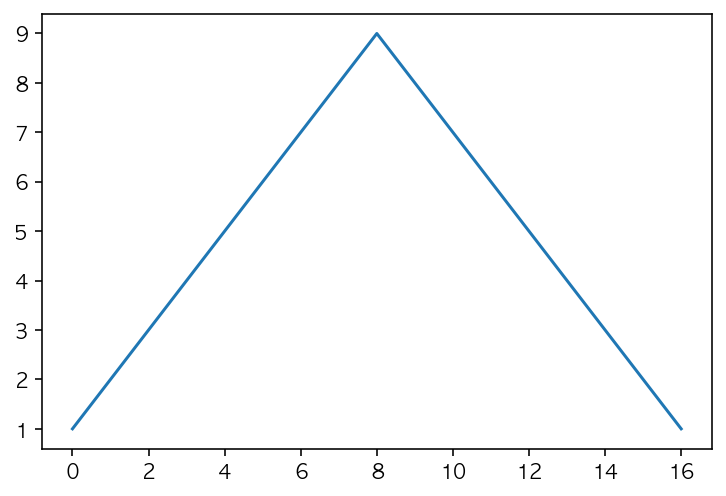

In [251]:
plt.figure
plt.plot([1,2,3,4,5,6,7,8,9,8,7,6,5,4,3,2,1])
plt.show()

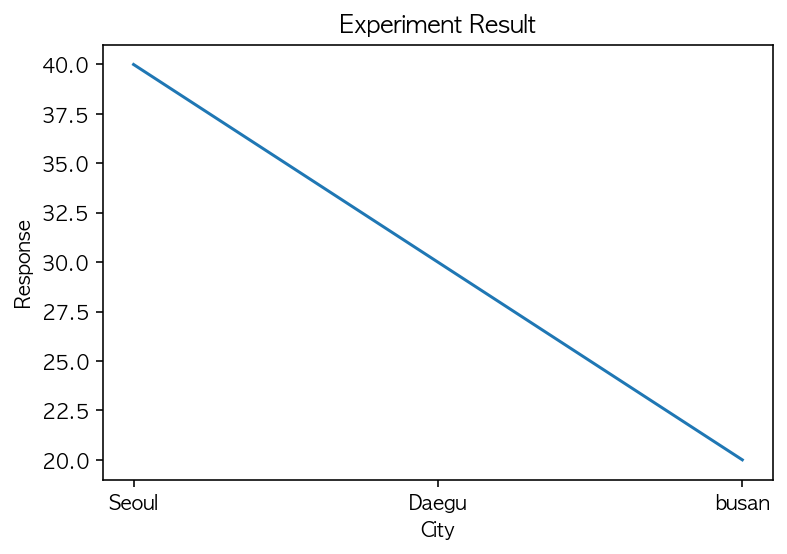

In [252]:
plt.figure
plt.plot(['Seoul','Daegu','busan'],[40,30,20])
plt.xlabel('City')
plt.ylabel('Response')
plt.title('Experiment Result')
plt.show()

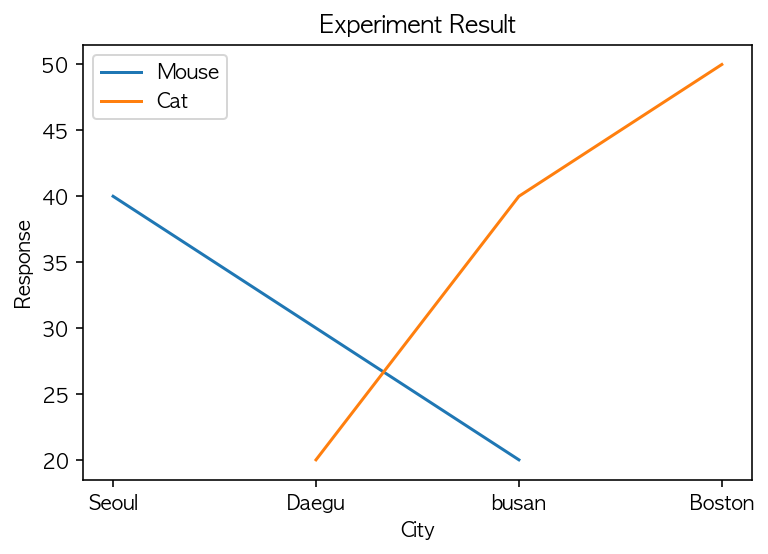

In [253]:
plt.figure
plt.plot(['Seoul','Daegu','busan'],[40,30,20])
plt.plot(['Daegu','busan','Boston'],[20,40,50])
plt.xlabel('City')
plt.ylabel('Response')
plt.title('Experiment Result')
plt.legend(['Mouse','Cat'])
plt.show()

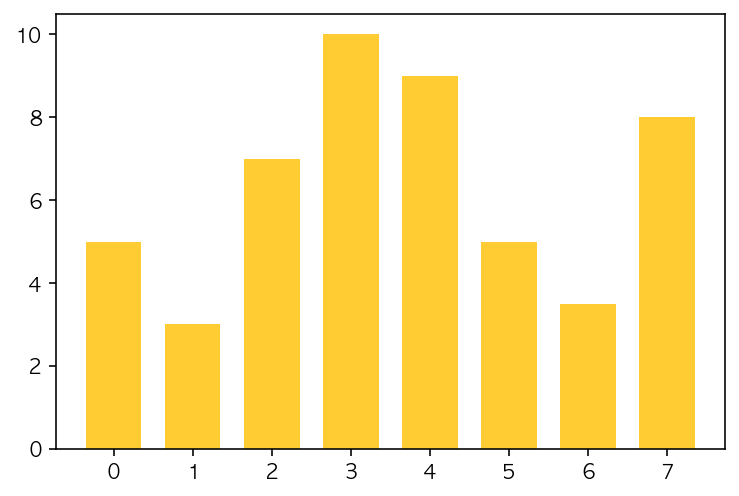

In [254]:
y = [5, 3, 7, 10, 9, 5, 3.5, 8]
x = range(len(y))
plt.bar(x, y, width=0.7, color="#ffcc33")
plt.show()

In [255]:
import numpy as np
t = np.arange(0, 12, 0.01)

In [256]:
y = np.sin(t)

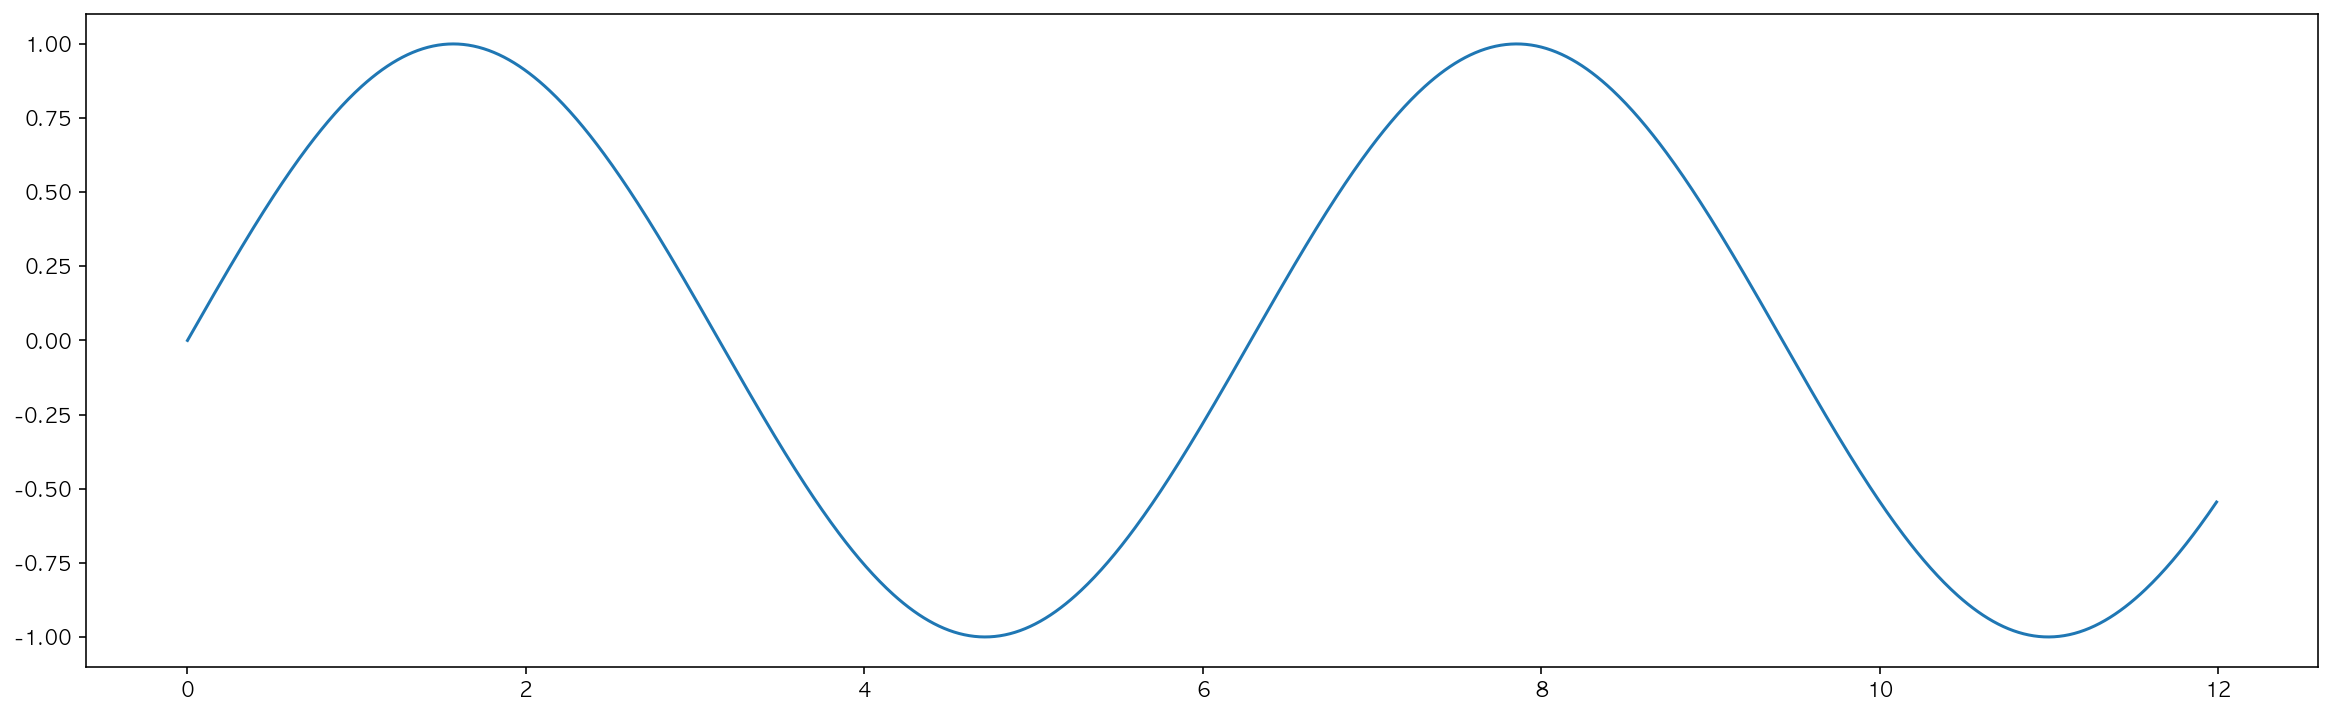

In [257]:
plt.figure(figsize=(20, 6))
plt.plot(t, y)
plt.show()

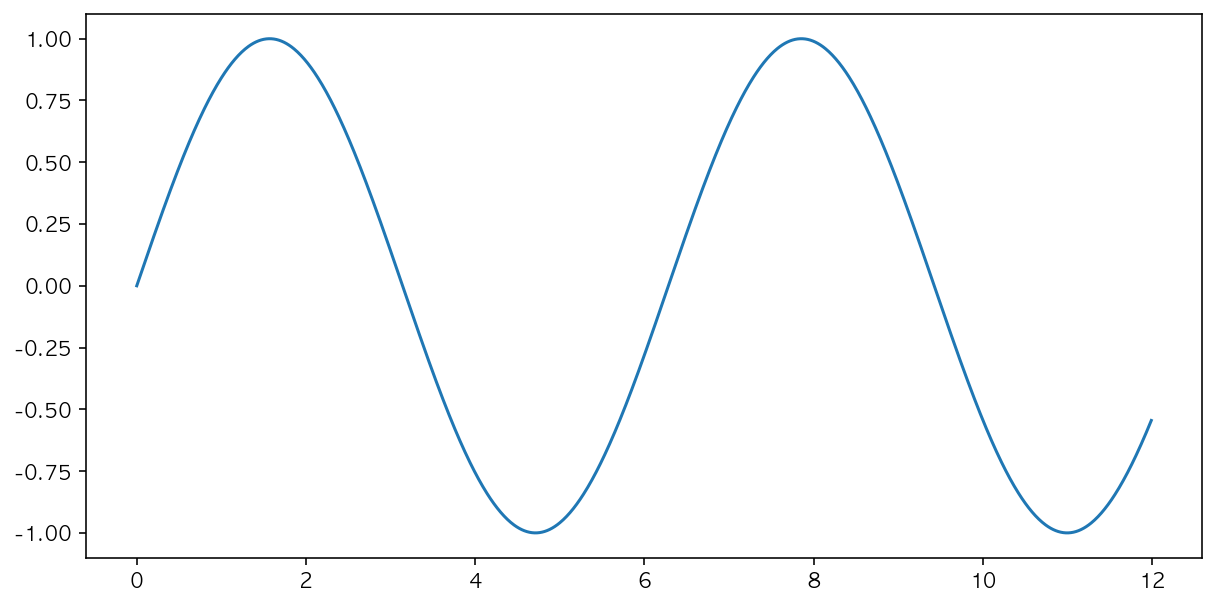

In [258]:
plt.figure(figsize=(10, 5))
plt.plot(t, y)
plt.show()

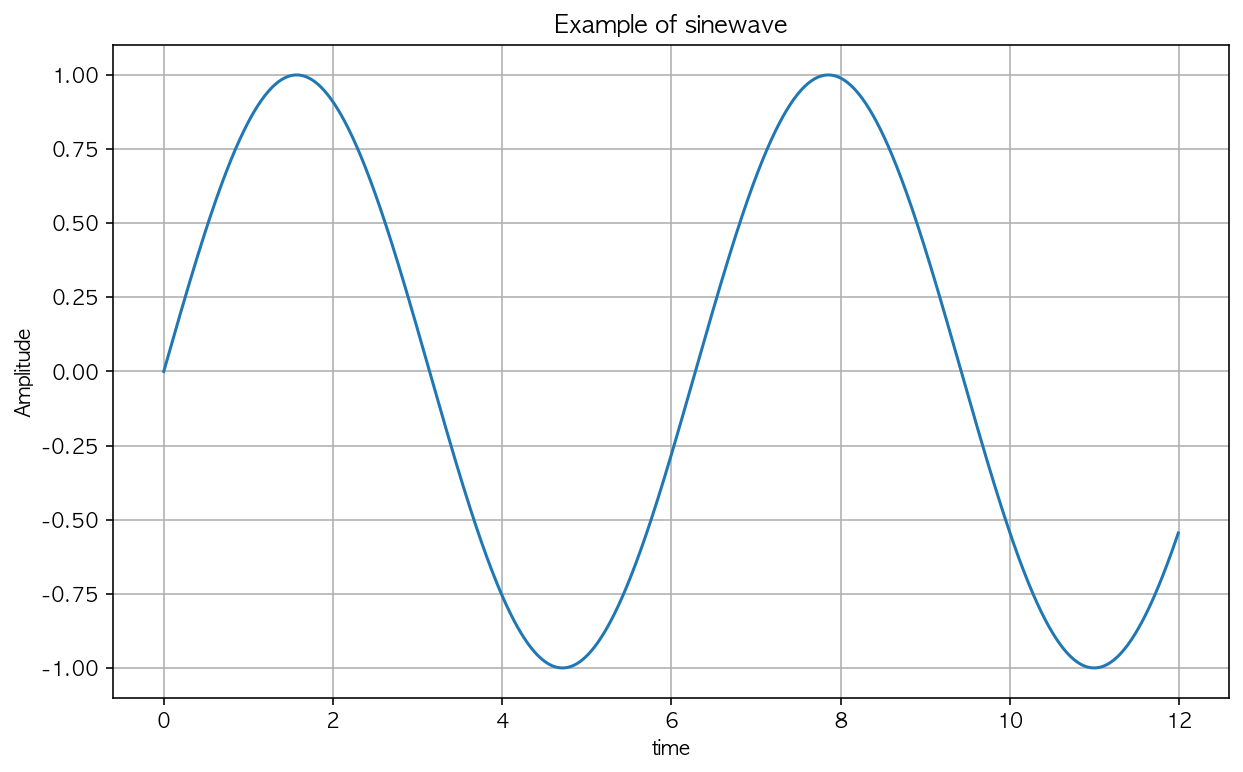

In [259]:
plt.figure(figsize=(10,6))
plt.plot(t, y)
plt.grid()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

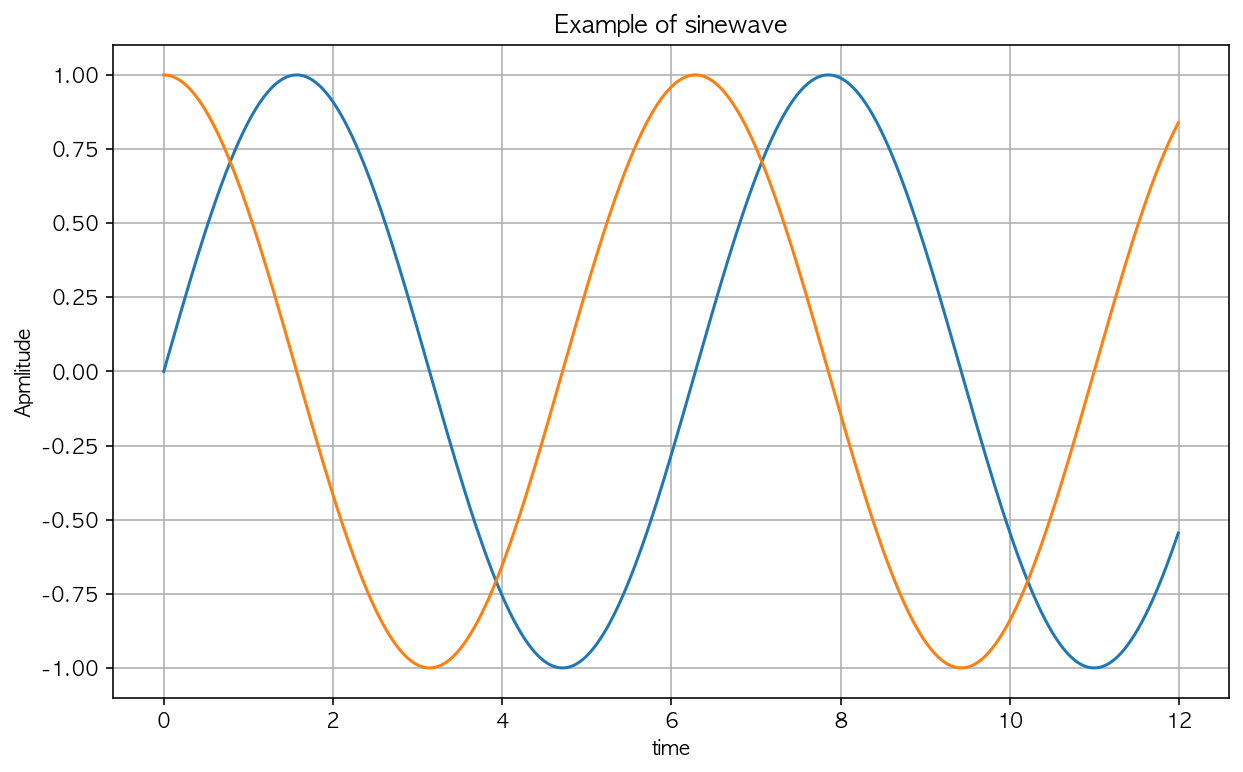

In [260]:
plt.figure(figsize=(10, 6))
plt.plot(t, np.sin(t))
plt.plot(t, np.cos(t))
plt.grid()
plt.xlabel('time')
plt.ylabel('Apmlitude')
plt.title('Example of sinewave')
plt.show()

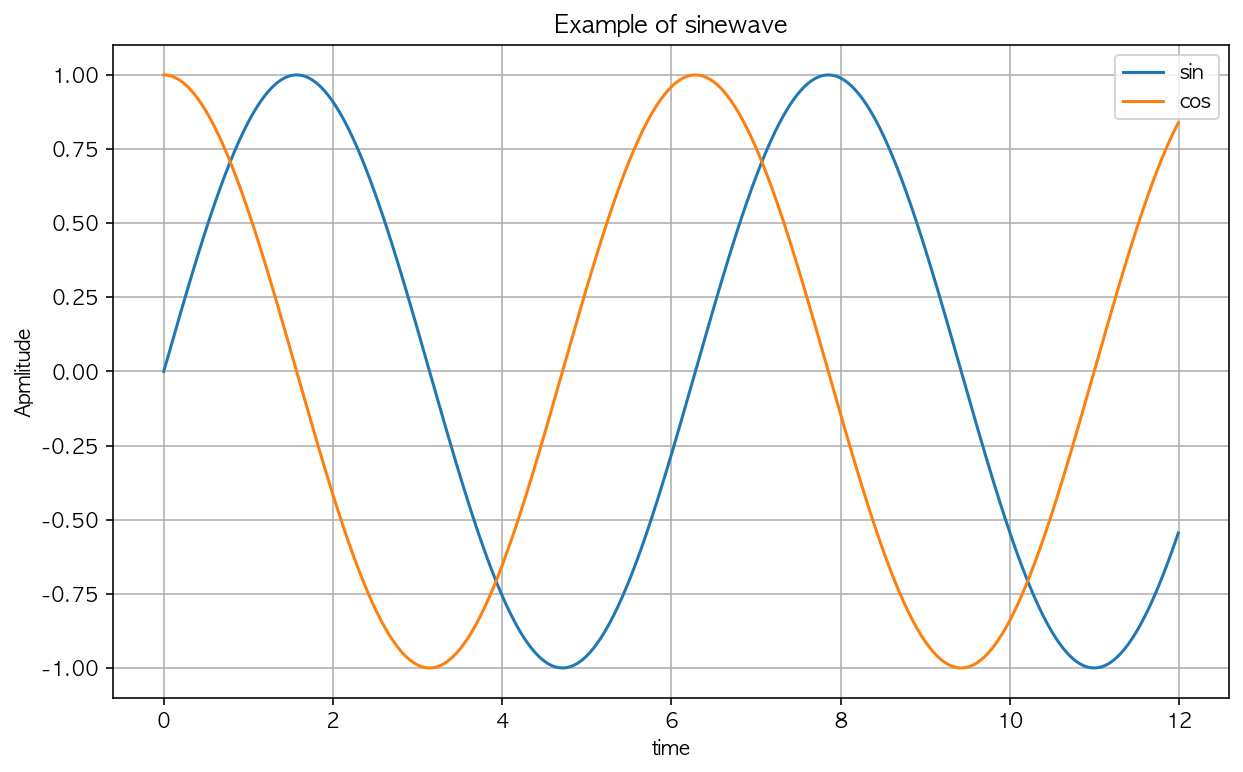

In [261]:
plt.figure(figsize=(10, 6))
plt.plot(t, np.sin(t), label='sin')
plt.plot(t, np.cos(t), label='cos')
plt.grid()
plt.legend()
plt.xlabel('time')
plt.ylabel('Apmlitude')
plt.title('Example of sinewave')
plt.show()

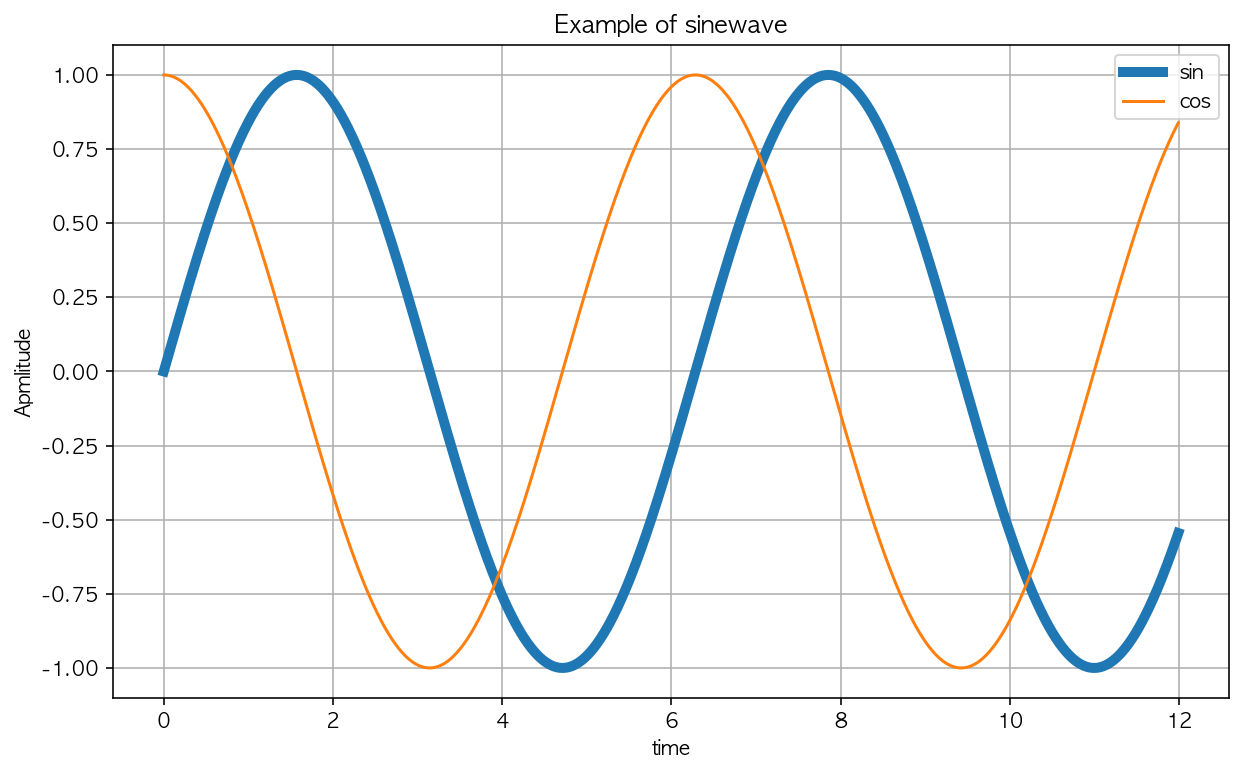

In [262]:
plt.figure(figsize=(10, 6))
plt.plot(t, np.sin(t), lw=5, label='sin')
plt.plot(t, np.cos(t), label='cos')
plt.grid()
plt.legend()
plt.xlabel('time')
plt.ylabel('Apmlitude')
plt.title('Example of sinewave')
plt.show()

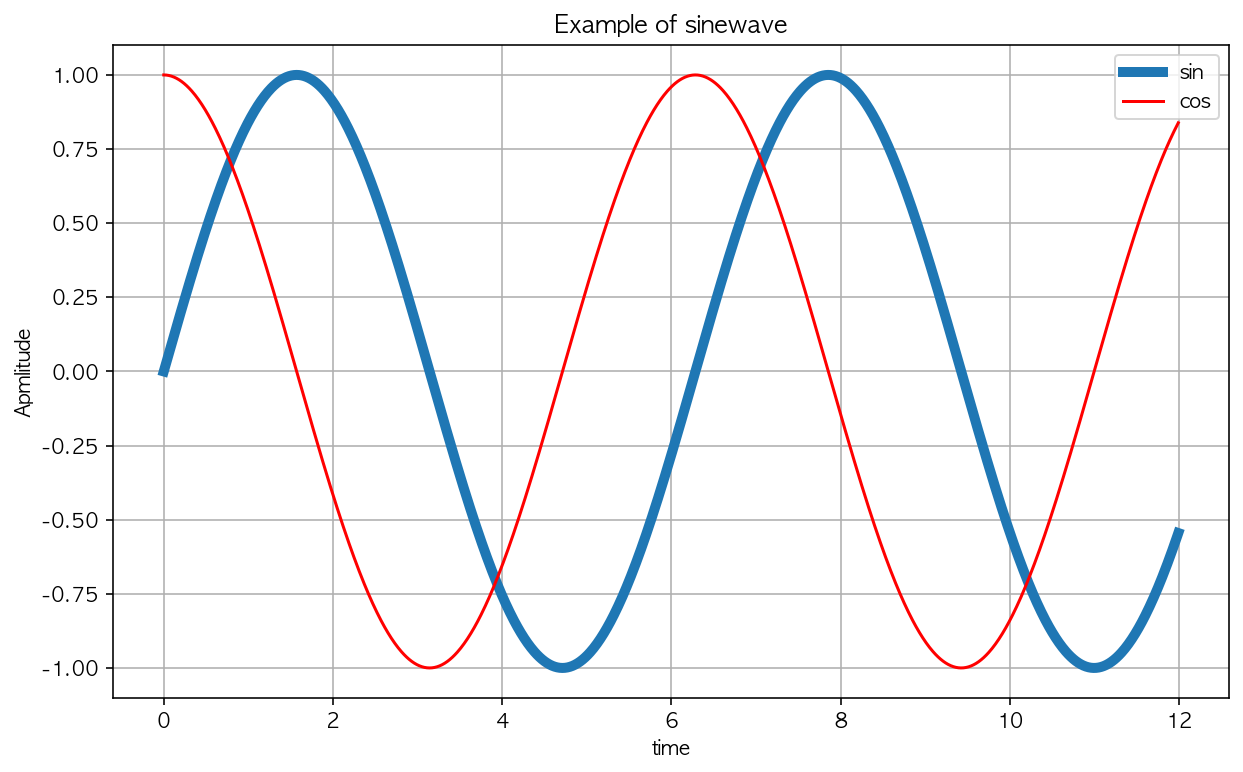

In [263]:
plt.figure(figsize=(10, 6))
plt.plot(t, np.sin(t), lw=5, label='sin')
plt.plot(t, np.cos(t), 'r', label='cos')
plt.grid()
plt.legend()
plt.xlabel('time')
plt.ylabel('Apmlitude')
plt.title('Example of sinewave')
plt.show()

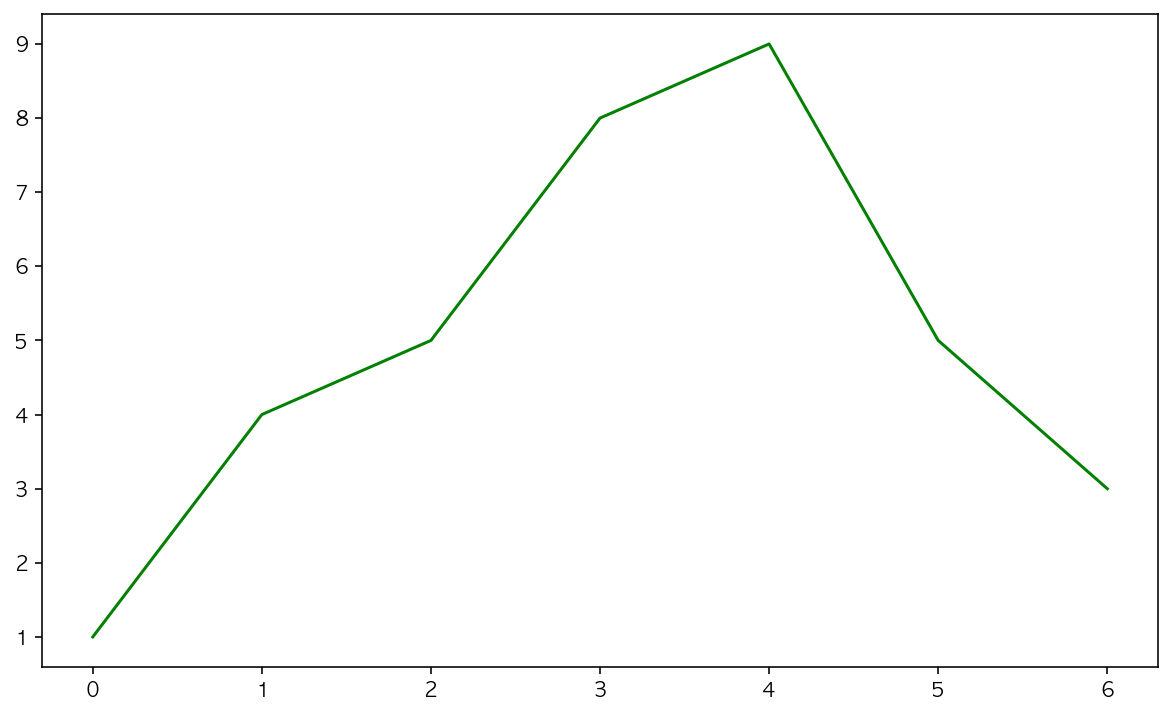

In [264]:
t = [0, 1, 2, 3, 4, 5, 6]
y = [1, 4, 5, 8, 9, 5, 3]
plt.figure(figsize=(10, 6))
plt.plot(t, y, color='green')
plt.show()

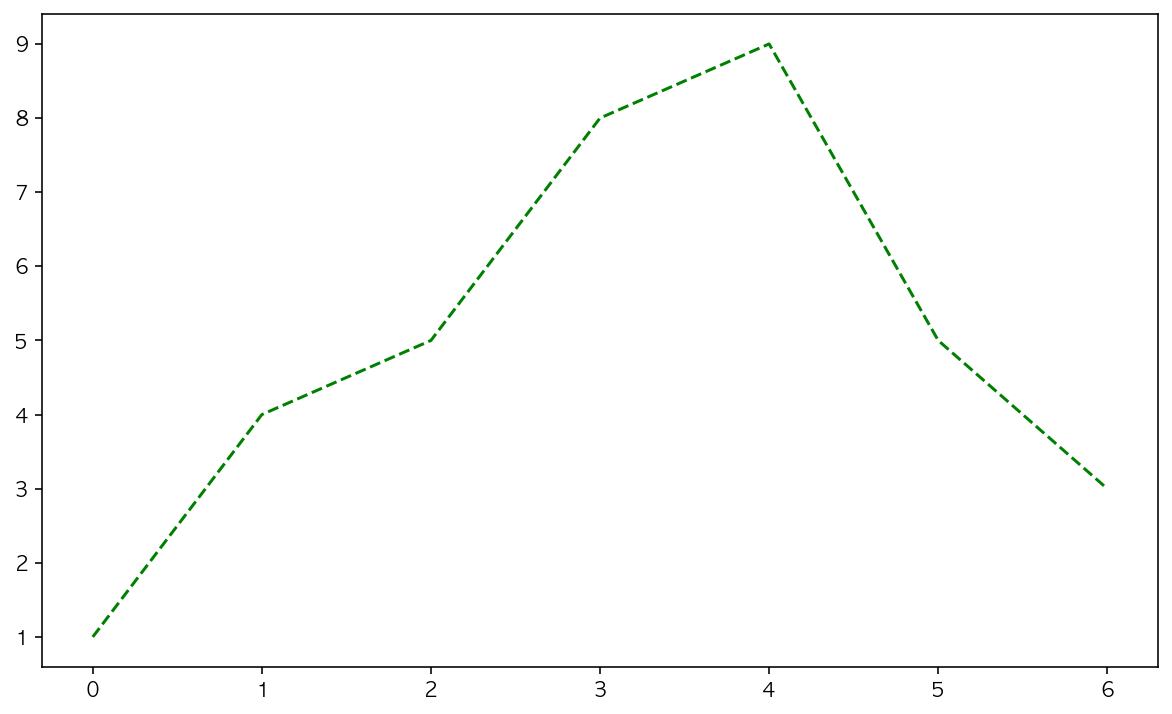

In [265]:
t = [0, 1, 2, 3, 4, 5, 6]
y = [1, 4, 5, 8, 9, 5, 3]
plt.figure(figsize=(10, 6))
plt.plot(t, y, color='green', linestyle='dashed')
plt.show()

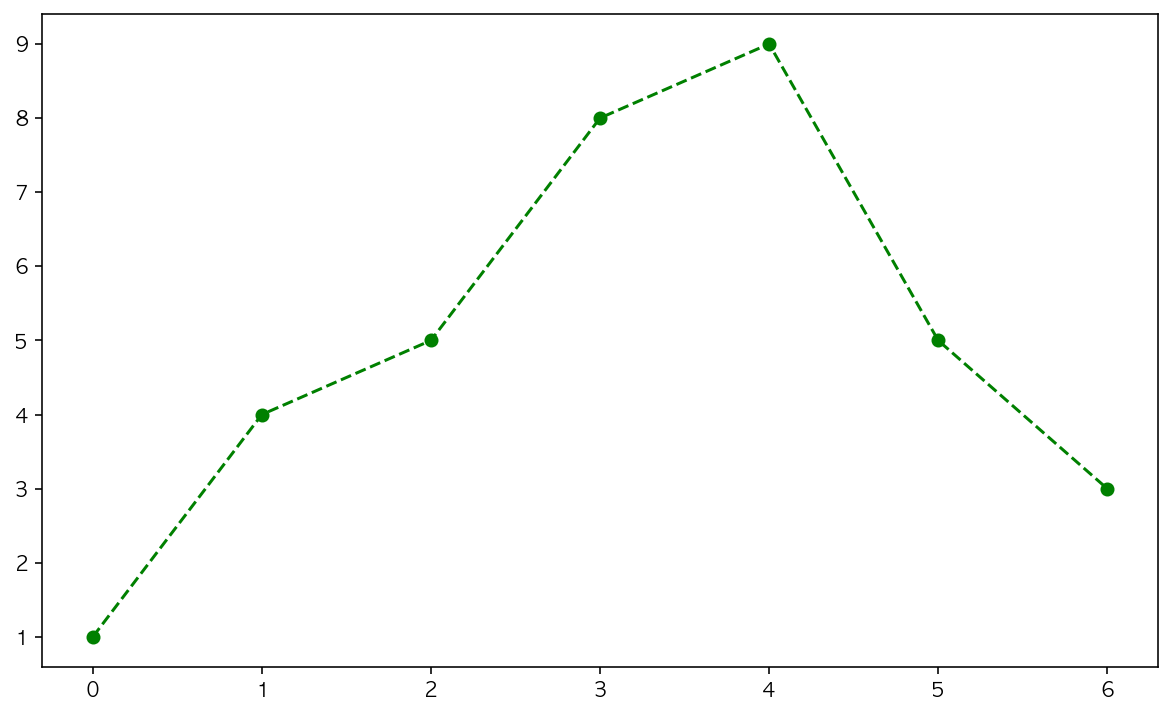

In [266]:
t = [0, 1, 2, 3, 4, 5, 6]
y = [1, 4, 5, 8, 9, 5, 3]
plt.figure(figsize=(10, 6))
plt.plot(t, y, color='green', linestyle='dashed', marker='o')
plt.show()

In [267]:
import numpy as np

In [268]:
t = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([9,8,7,9,8,3,2,4,3,4])

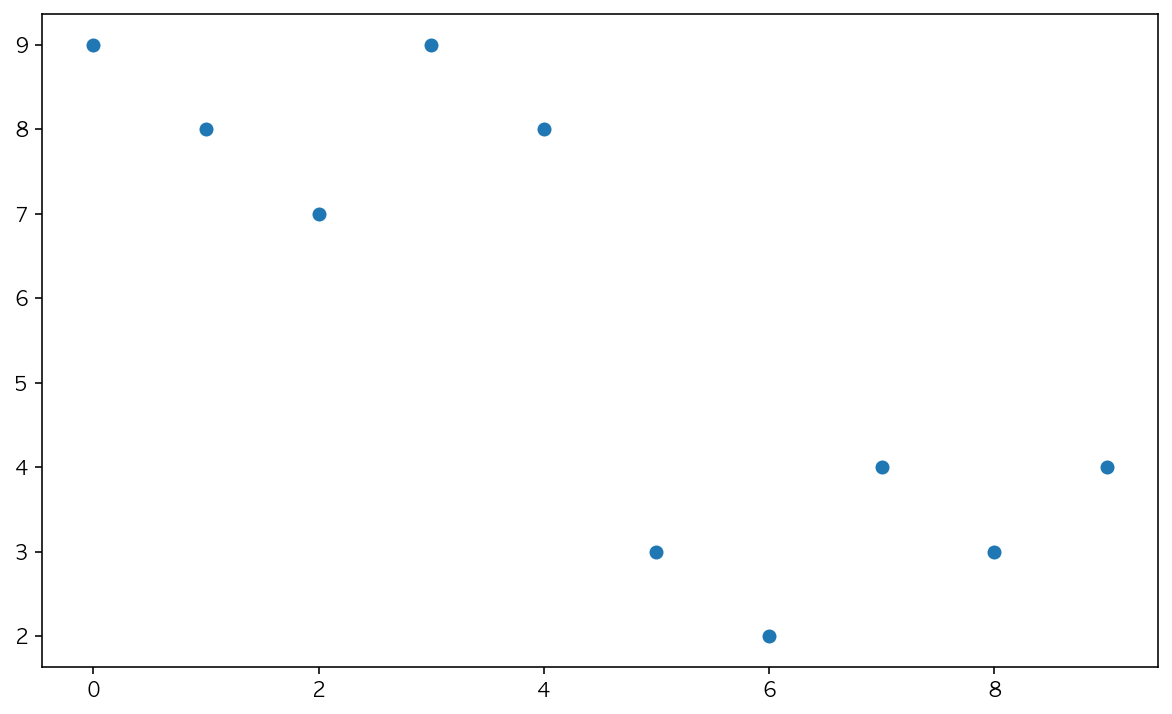

In [269]:
plt.figure(figsize=(10,6))
plt.scatter(t,y)
plt.show()

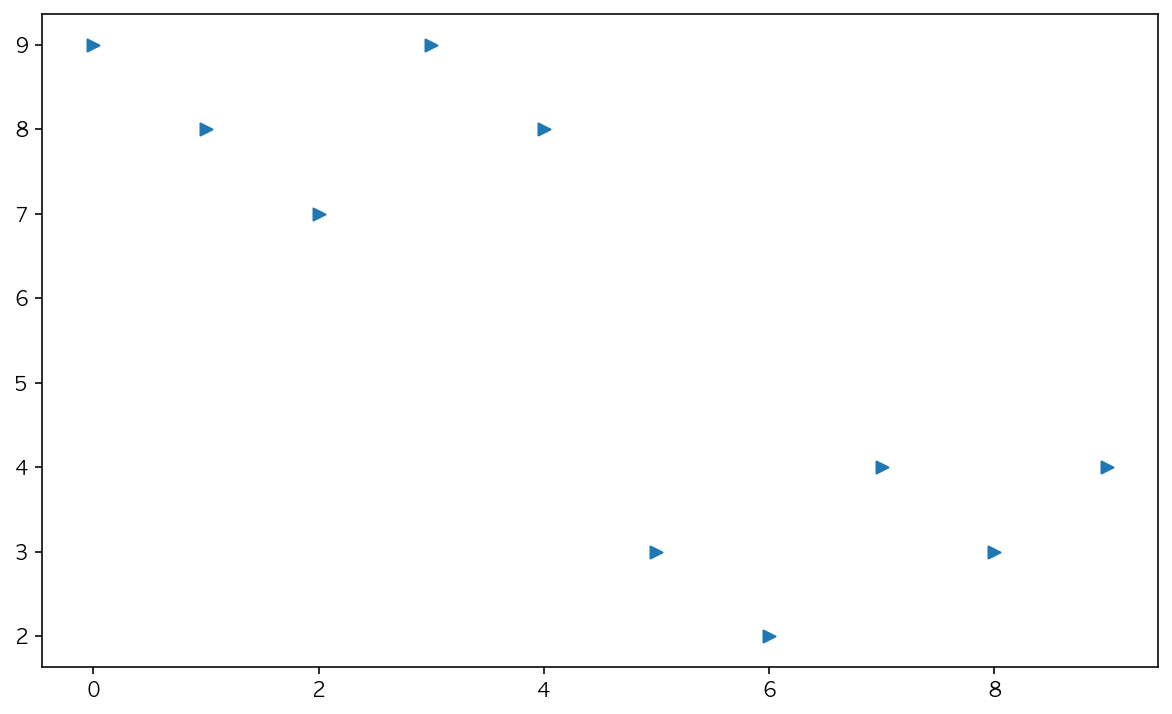

In [270]:
plt.figure(figsize=(10,6))
plt.scatter(t,y, marker='>')
plt.show()

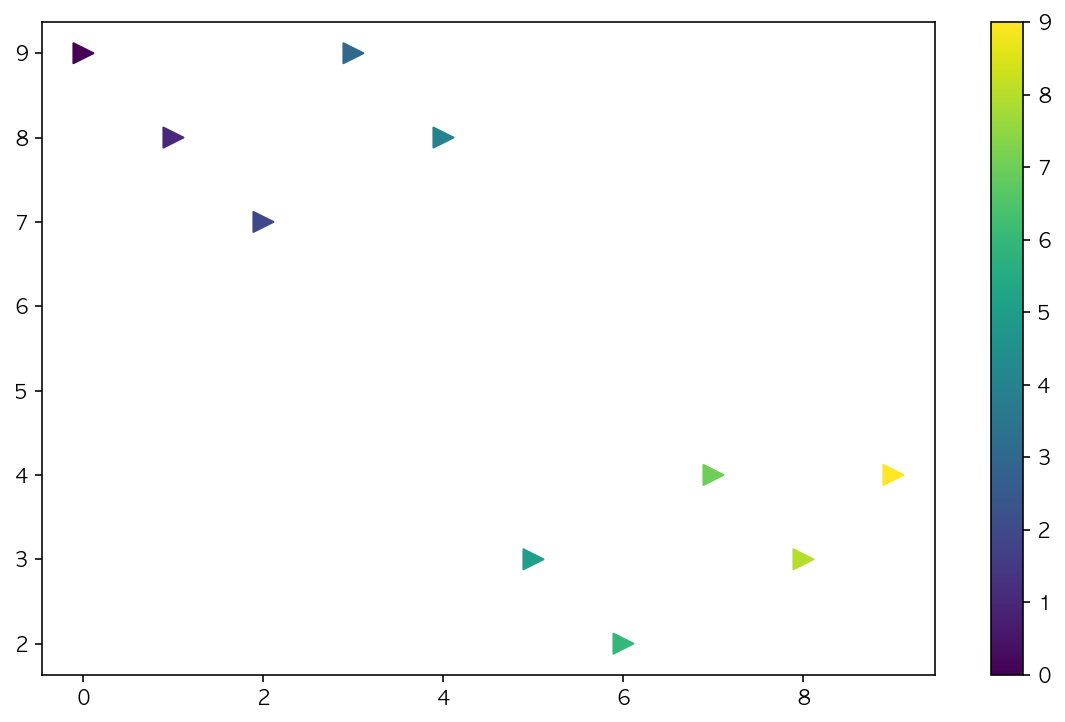

In [271]:
colormap = t
plt.figure(figsize=(10,6))
plt.scatter(t,y, s=100, c=colormap, marker='>')
plt.colorbar()
plt.show()

##### numpy의 랜덤변수 함수를 이용해서 데이터 생성
loc옵션으로 평균값과 sale옵션으로 표준편차를 정함

In [272]:
s1 = np.random.normal(loc=0, scale=1, size=1000)
s2 = np.random.normal(loc=5, scale=0.5, size=1000)
s3 = np.random.normal(loc=10, scale=2, size=1000)

In [273]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

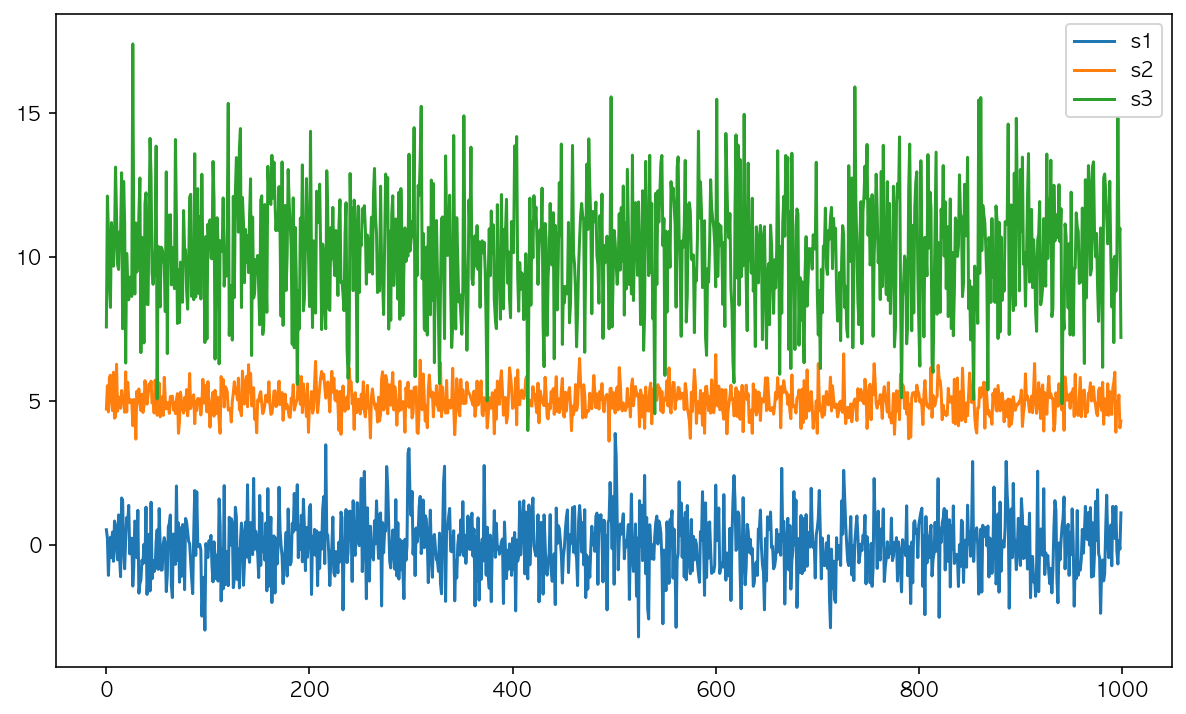

In [274]:
plt.figure(figsize=(10, 6))
plt.plot(s1, label='s1')
plt.plot(s2, label='s2')
plt.plot(s3, label='s3')
plt.legend()
plt.show()

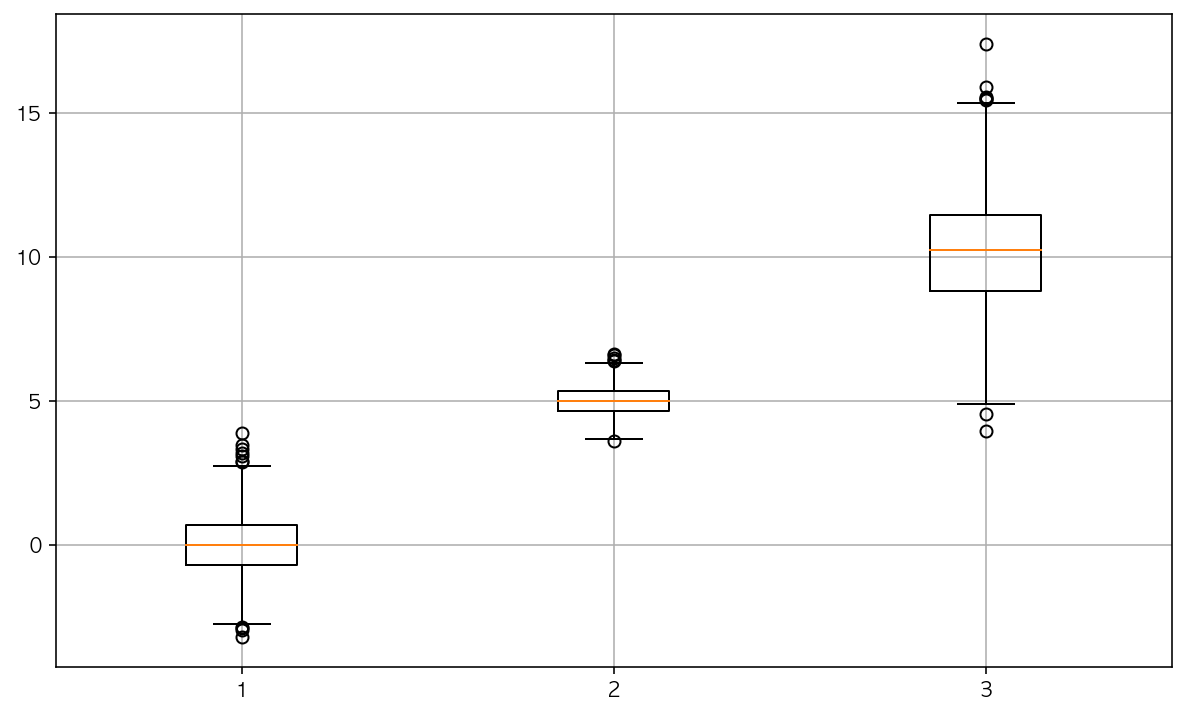

In [275]:
plt.figure(figsize=(10,6))
plt.boxplot((s1, s2, s3))
plt.grid()
plt.show()

##### 정규분포(np.random.normal)로 부터 개수가 5개(size=5)인 무작위 샘플 생성
무작위 샘플 추출을 할 때마다 값이 달라짐을 알 수 있음

In [276]:
import numpy as np

In [277]:
np.random.normal(size=5)

array([-0.39683153,  0.92892177,  0.89663574,  0.32275553,  2.01739758])

In [278]:
np.random.normal(size=5)

array([-1.18097663,  0.62339667, -1.061322  ,  0.83869922, -2.67481444])

##### 난수 생성 할 때 마다 달라지는 것이 아니라, 누가, 언제 하든지 간에 똑같은 난수 생성을 원하다면
(즉, 재현가능성, reproducibility) seed 번호를 지정해주면 됨

In [279]:
np.random.seed(seed=100)

In [280]:
np.random.normal(size=5)

array([-1.74976547,  0.3426804 ,  1.1530358 , -0.25243604,  0.98132079])

In [281]:
np.random.seed(seed=100)

In [282]:
np.random.normal(size=5)

array([-1.74976547,  0.3426804 ,  1.1530358 , -0.25243604,  0.98132079])

# cctv 현황 그래프로 분석

## 현재 사용하는 시스템 환경 확인

In [283]:
import platform

In [284]:
platform.machine() # 현재 사용하고 있는 시스템 유형

'x86_64'

In [285]:
platform.node() # 네트워크 이름 (시스템 속성/전체컴퓨터이름)

'Jinkyus-MacBook-Pro.local'

In [286]:
platform.processor() # 시스템에서 사용하는 프로세서

'i386'

In [287]:
platform.python_build() # 파이썬 빌드 번호와 시간

('default', 'Feb 15 2020 22:55:21')

In [288]:
platform.python_compiler()# 컴파일러 정보

'GCC 4.2.1 Compatible Apple LLVM 11.0.0 (clang-1100.0.33.17)'

In [289]:
platform.system() # 현 시스템에서 사용하는 OS

'Darwin'

In [290]:
platform.version() # 시스템의 릴리즈 버전을 반환

'Darwin Kernel Version 19.3.0: Thu Jan  9 20:58:23 PST 2020; root:xnu-6153.81.5~1/RELEASE_X86_64'

In [291]:
platform.uname() # 시스템에 대한 여러가지 정보값을 확인

uname_result(system='Darwin', node='Jinkyus-MacBook-Pro.local', release='19.3.0', version='Darwin Kernel Version 19.3.0: Thu Jan  9 20:58:23 PST 2020; root:xnu-6153.81.5~1/RELEASE_X86_64', machine='x86_64', processor='i386')

## 그래프 분석

In [292]:
import platform
import matplotlib as plt
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']=False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = 'c:Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', famil=font_name)
else:
    print('Unknown system... sorry~~~~')

In [293]:
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,5221.0,112.668024,546875.0,541854.0,5021.0,68104.0,0.918126,12.453303
1,강동구,1879.0,128.033981,429601.0,425267.0,4334.0,59742.0,1.008843,13.906392
2,강북구,1265.0,168.008475,321151.0,317386.0,3765.0,58858.0,1.172346,18.327204
3,강서구,1617.0,228.658537,602886.0,596287.0,6599.0,80903.0,1.094568,13.419287
4,관악구,3985.0,340.331492,520645.0,502615.0,18030.0,73005.0,3.463012,14.022030


In [296]:
import matplotlib.pyplot as plt

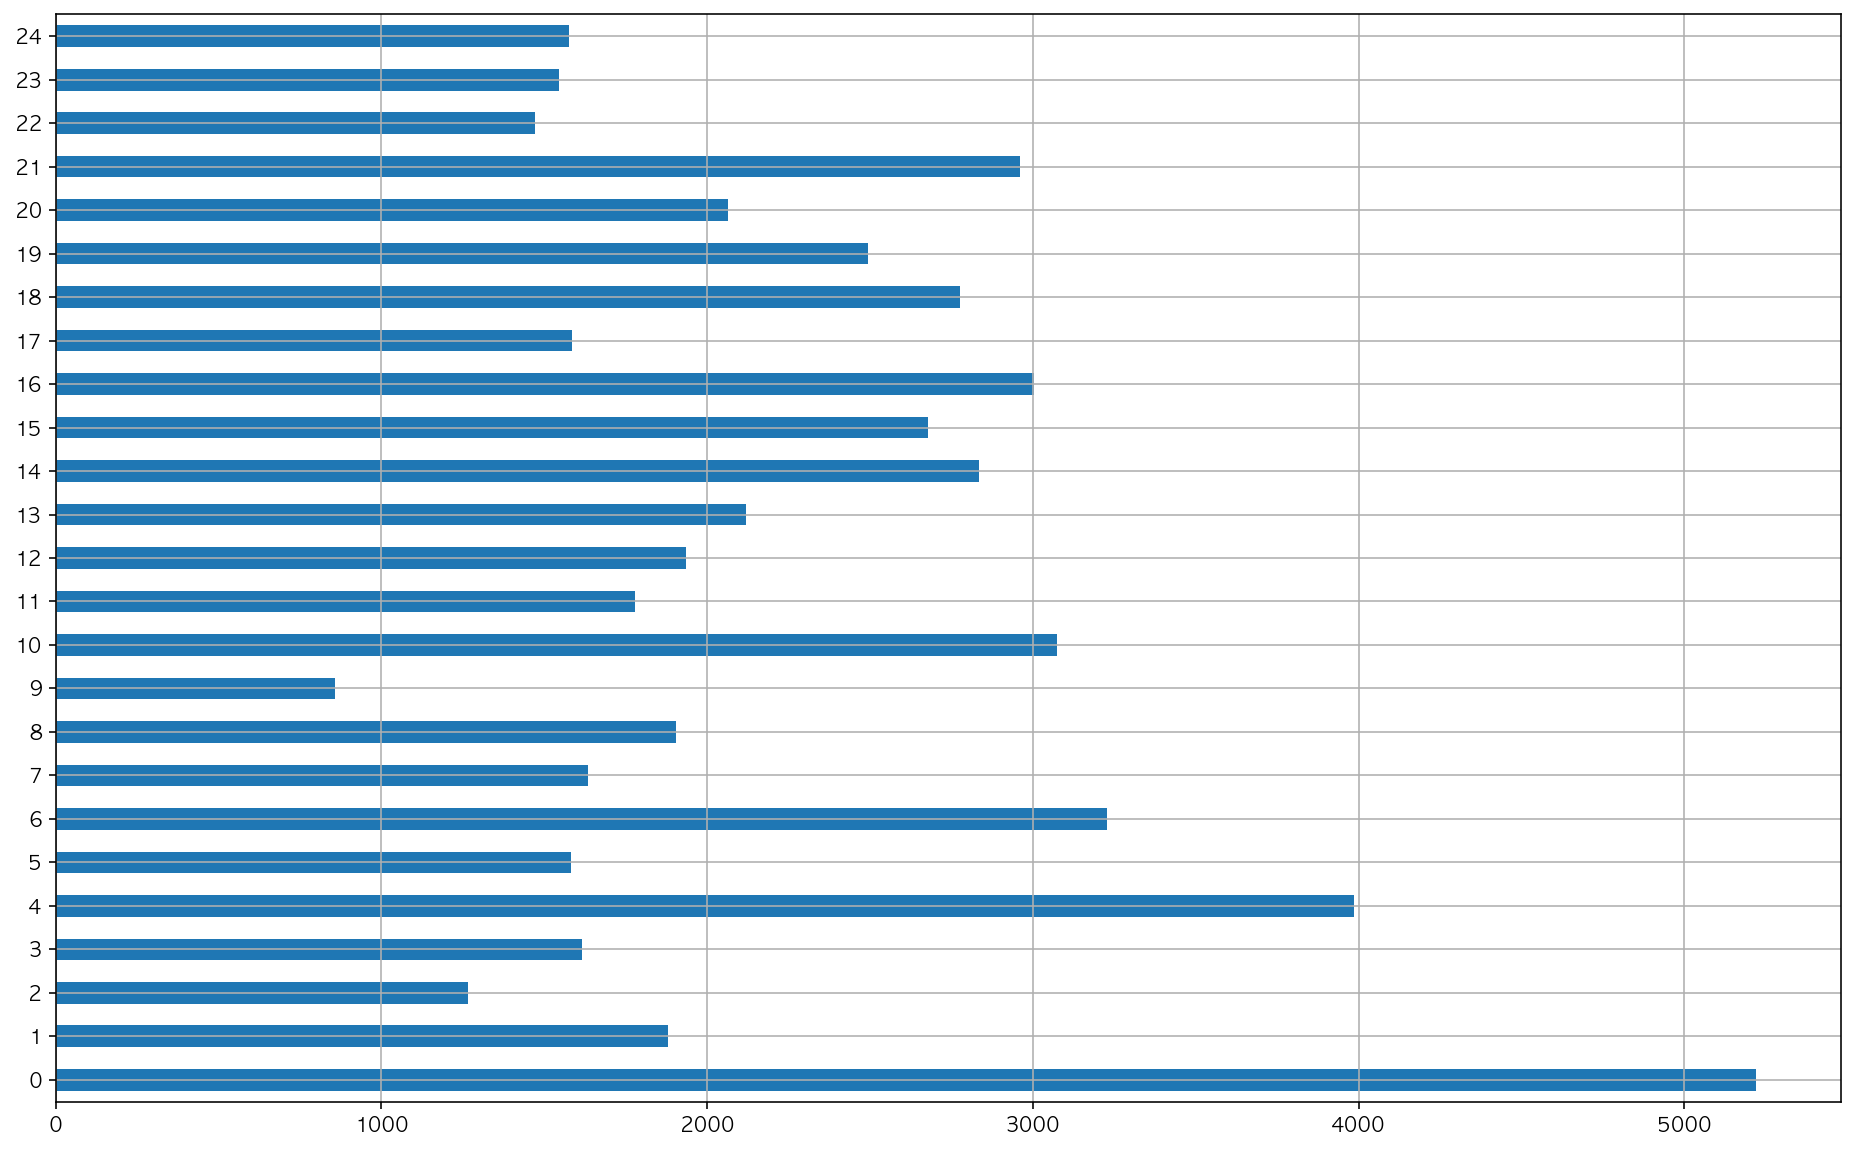

In [297]:
data_result['소계'].plot(kind='barh', grid=True, figsize=(16,10))
plt.show()

In [302]:
data_result.set_index("구별", inplace=True)

In [303]:
data_result

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,5221.0,112.668024,546875.0,541854.0,5021.0,68104.0,0.918126,12.453303
강동구,1879.0,128.033981,429601.0,425267.0,4334.0,59742.0,1.008843,13.906392
강북구,1265.0,168.008475,321151.0,317386.0,3765.0,58858.0,1.172346,18.327204
강서구,1617.0,228.658537,602886.0,596287.0,6599.0,80903.0,1.094568,13.419287
관악구,3985.0,340.331492,520645.0,502615.0,18030.0,73005.0,3.463012,14.022030
광진구,1581.0,165.714286,370658.0,354873.0,15785.0,46288.0,4.258643,12.488062
구로구,3227.0,127.253521,438889.0,404726.0,34163.0,63017.0,7.783973,14.358300
금천구,1634.0,471.328671,254244.0,233981.0,20263.0,36301.0,7.969903,14.278016
노원구,1906.0,137.952559,545486.0,541174.0,4312.0,78170.0,0.790488,14.330340


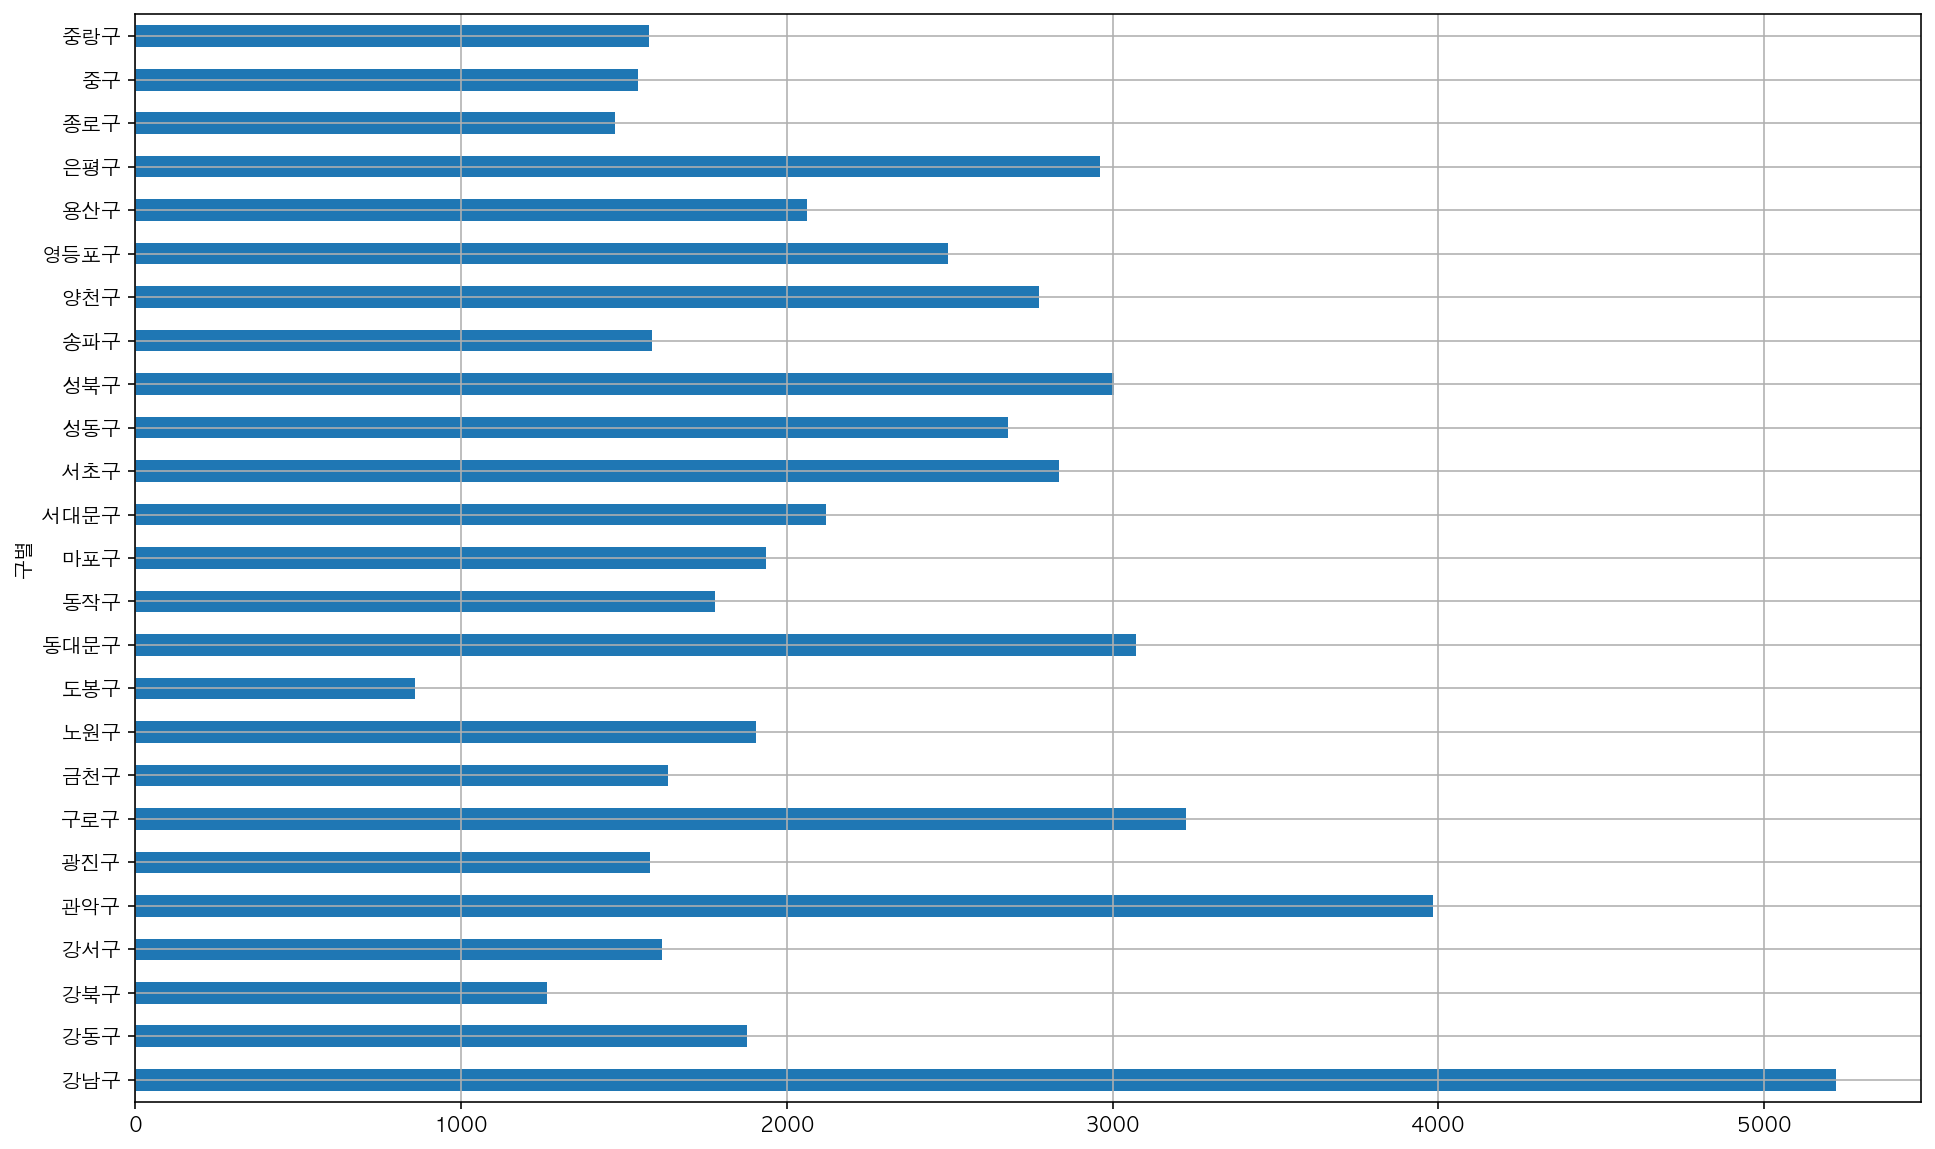

In [304]:
data_result['소계'].plot(kind='barh', grid=True, figsize=(16,10))
plt.show()

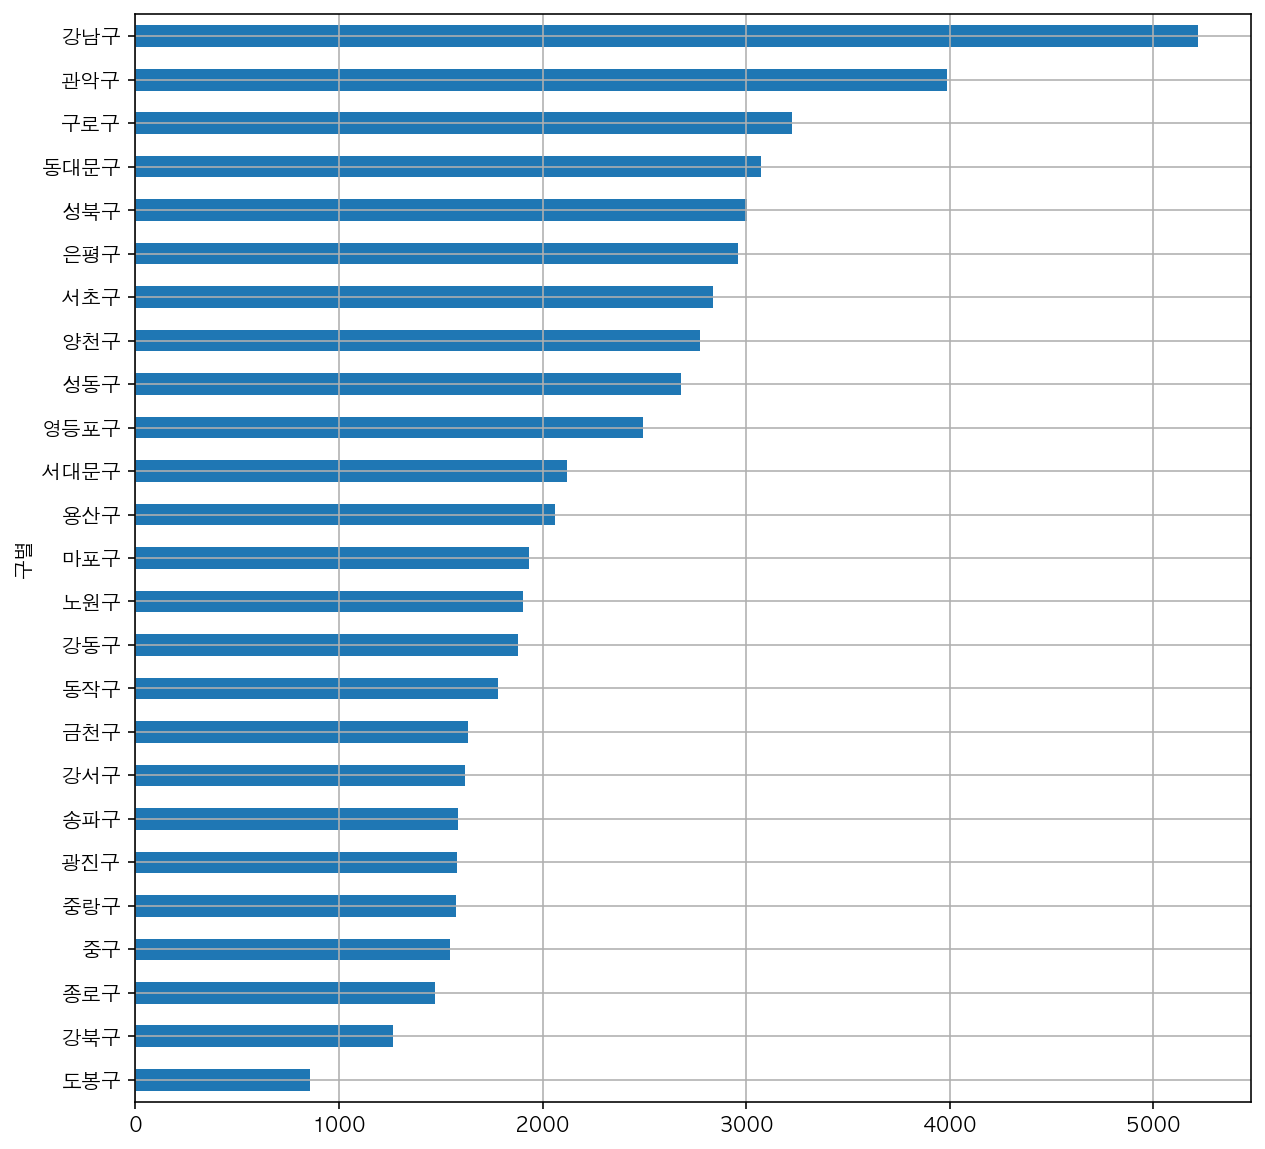

In [306]:
data_result['소계'].sort_values().plot(kind='barh', grid=True, figsize=(10, 10))
plt.show()

In [307]:
data_result['CCTV비율'] = data_result['소계'] / data_result['인구수'] * 100

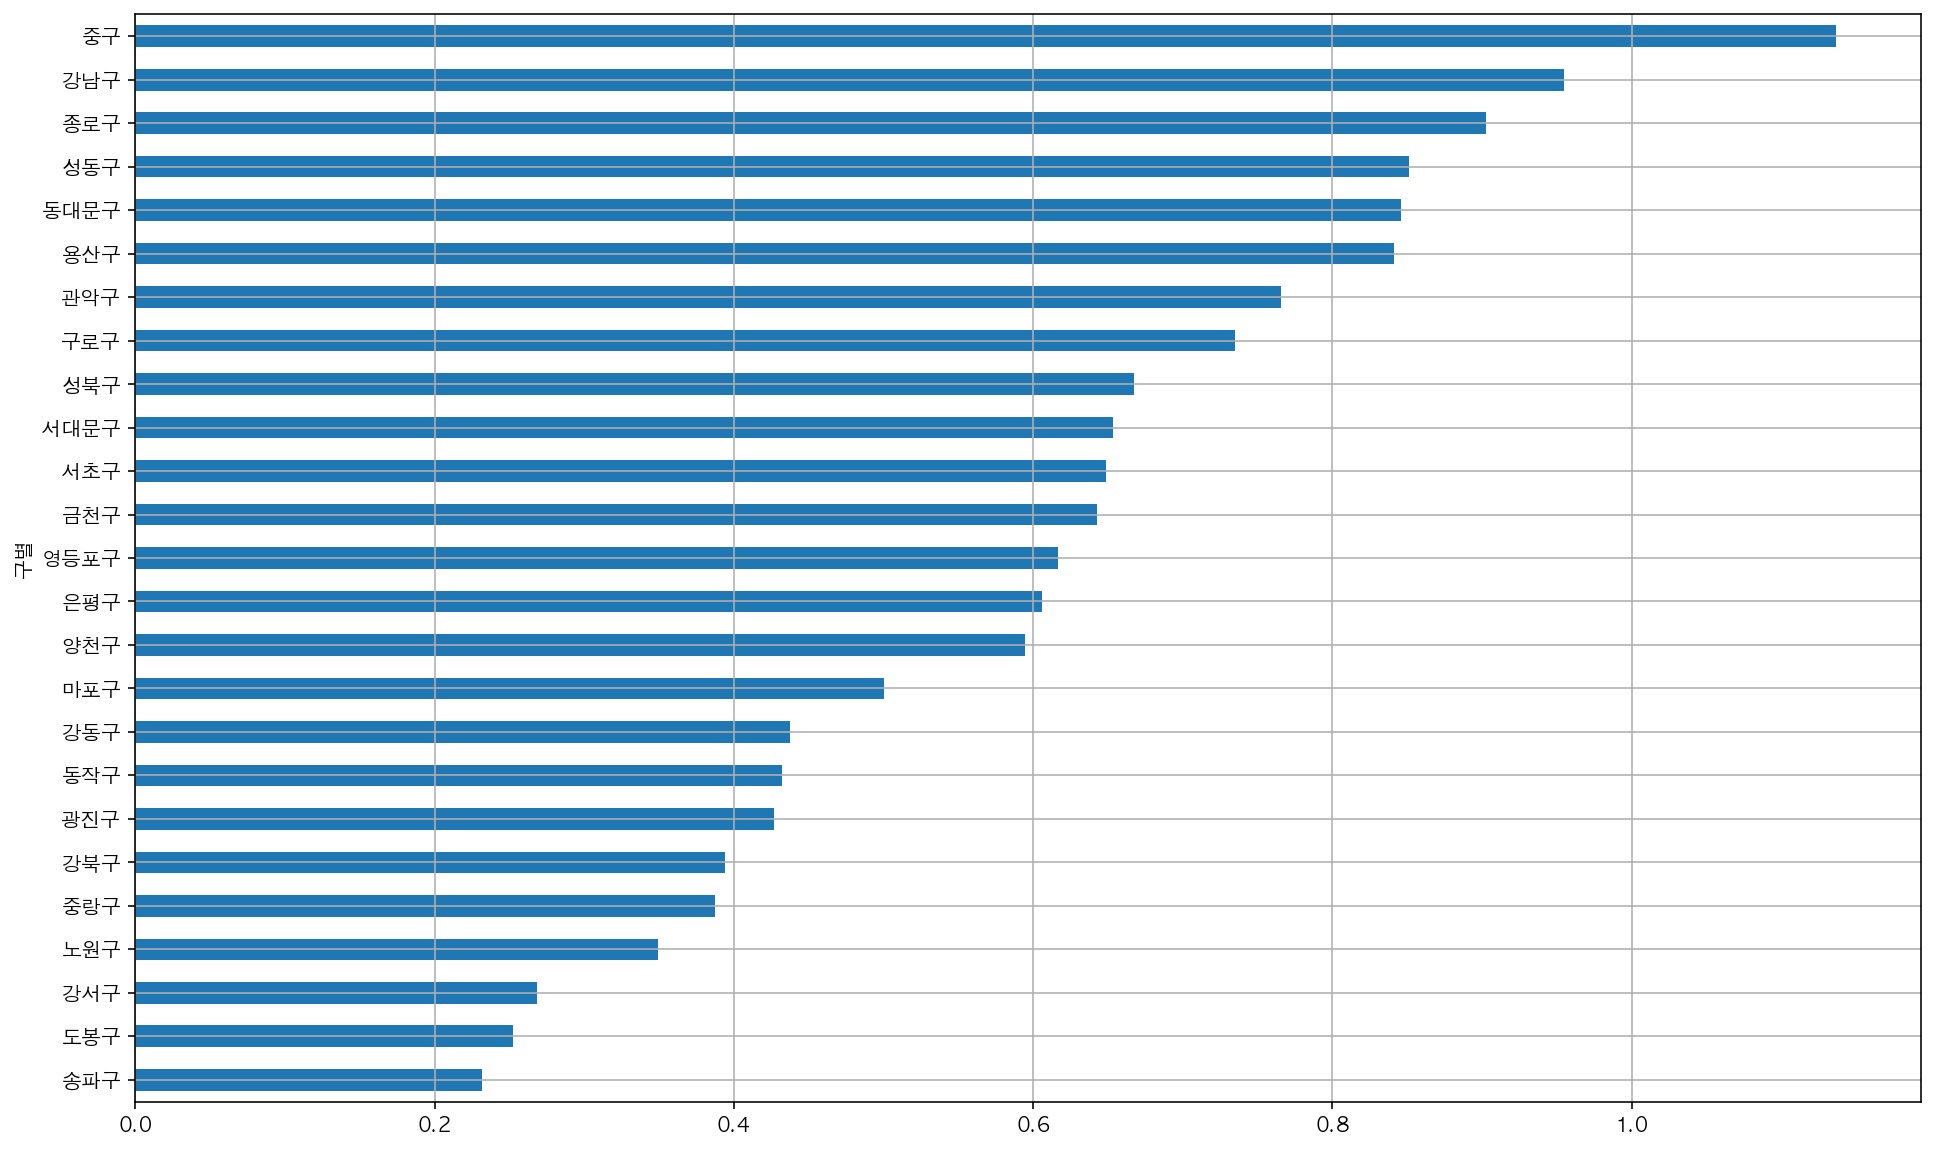

In [309]:
data_result['CCTV비율'].sort_values().plot(kind='barh', grid=True, figsize=(16,10))
plt.show()

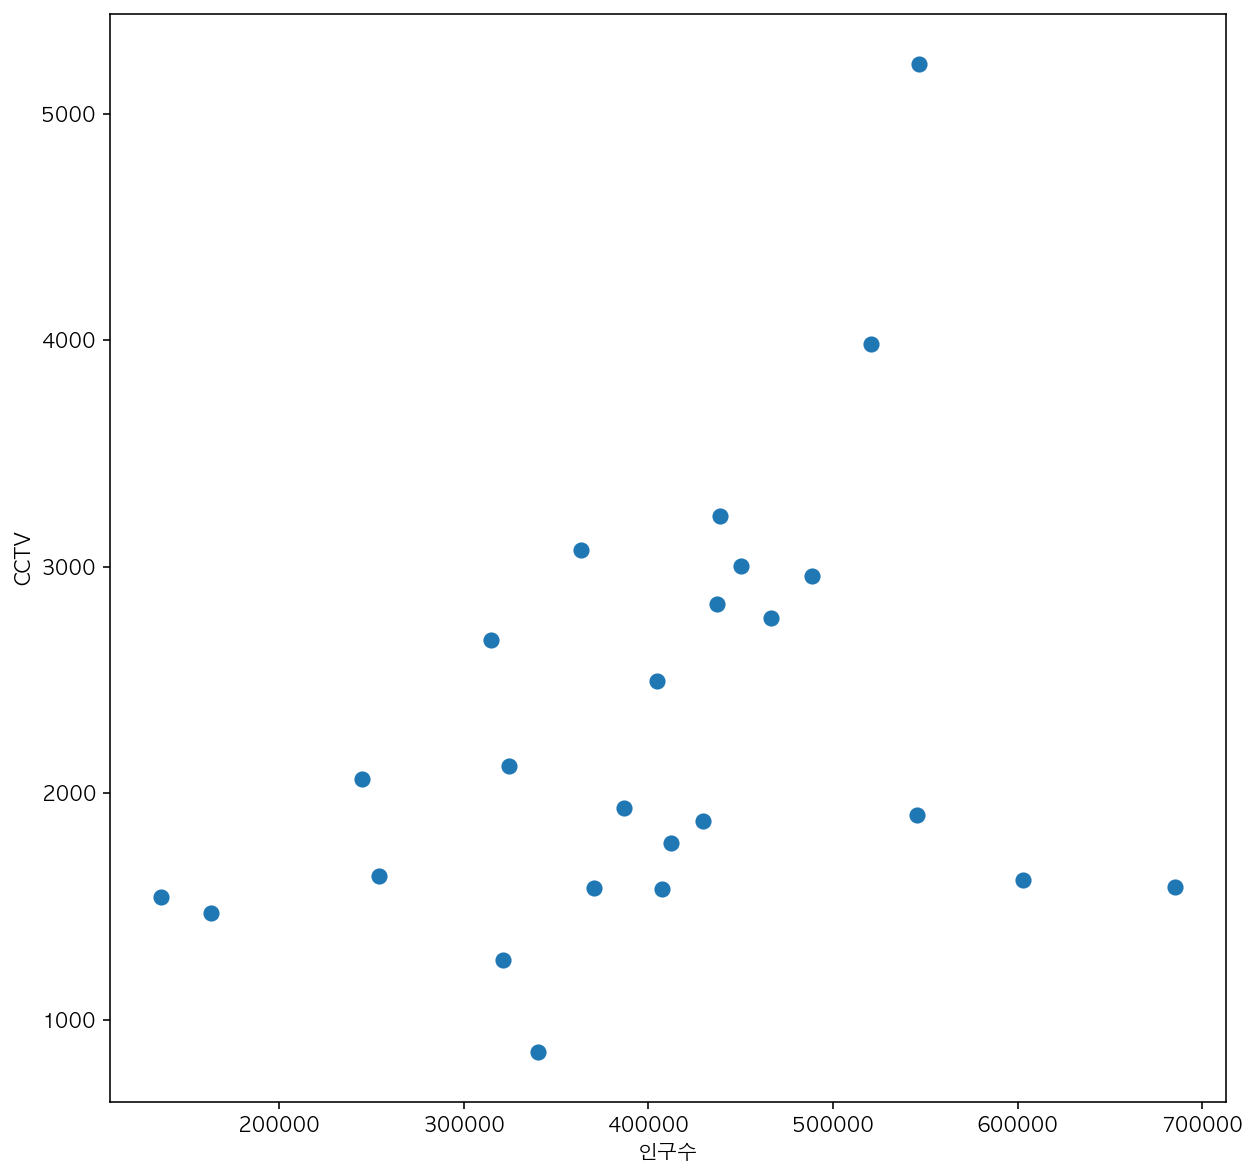

In [312]:
plt.figure(figsize=(10,10))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.show()

##### polyfit( x, y, n) : y에 대한 x 그래프를 그렸을 때 오차가 가장 작은 n차 방정식의 계수를 저장함
corrcoef( a, b) : a와 b의 상관계수(cor)행렬을 출력함.



In [314]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)
fp1

array([2.70597696e-03, 1.19453834e+03])

In [316]:
import numpy as np

##### 다항식(Polynomial)

In [324]:
import numpy as np

In [326]:
a = np.poly1d([1,2,3])

poly1d([1,2,3]) 이라고 컴퓨터에 입력하면 그건 다음 이차식을 만들겠다는 뜻이다.

1x² + 2x + 3


In [327]:
print(a)

   2
1 x + 2 x + 3


In [328]:
b = np.poly1d([1,2,3,4])

In [330]:
print(b)

   3     2
1 x + 2 x + 3 x + 4


In [332]:
c = np.poly1d([-1, 1, 2], True) # 1, -1, -2의 해를 가지는 방정식

In [333]:
print(c) # 인수분해 된 다항식을 만들라는 의미이지만, 출력될때는 식을 전개한 꼴로 출력됨

   3     2
1 x - 2 x - 1 x + 2


In [334]:
print(c[0]) # 0차항 즉 상수항

2.0


In [335]:
print(c[1]) # 1차항

-1.0


In [336]:
print(c[2]) # 2차항

-2.0


In [337]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)
fp1

array([2.70597696e-03, 1.19453834e+03])

In [322]:
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100) # num은 시작과 끝 사이를 몇 등분

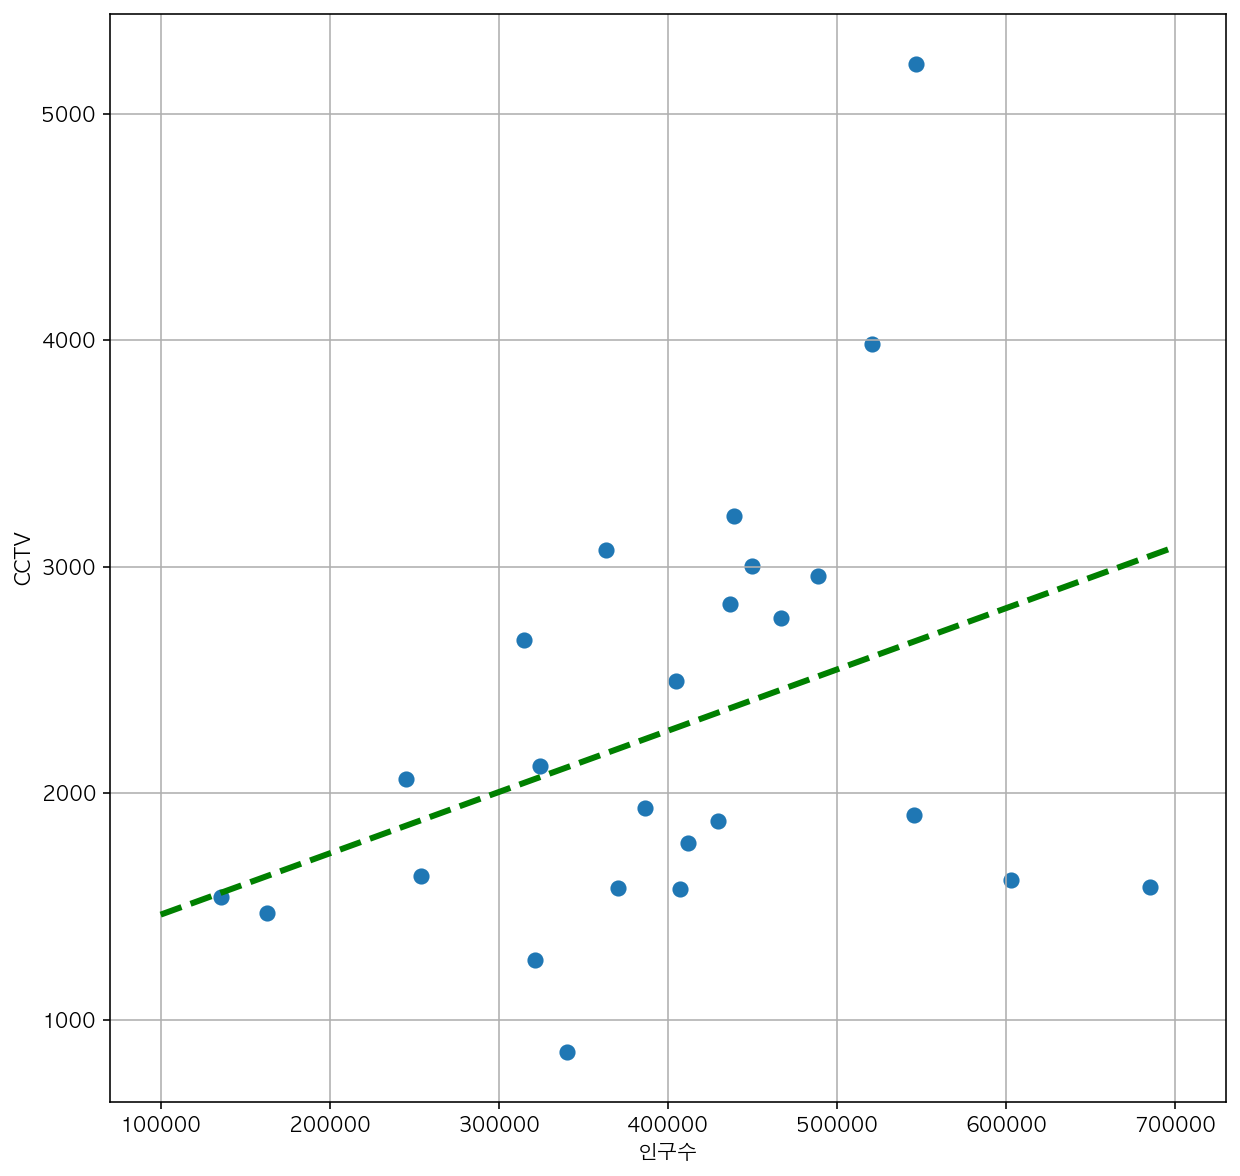

In [323]:
plt.figure(figsize=(10,10))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [340]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)

f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수']))

df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,5221.0,112.668024,546875.0,541854.0,5021.0,68104.0,0.918126,12.453303,0.954697,2546.630511
송파구,1586.0,101.524778,685361.0,678521.0,6840.0,83492.0,0.998014,12.182193,0.231411,1463.109414
관악구,3985.0,340.331492,520645.0,502615.0,18030.0,73005.0,3.463012,14.022030,0.765397,1381.608286
도봉구,858.0,216.605166,340089.0,337820.0,2269.0,56742.0,0.667178,16.684456,0.252287,1256.811338
강서구,1617.0,228.658537,602886.0,596287.0,6599.0,80903.0,1.094568,13.419287,0.268210,1208.933964


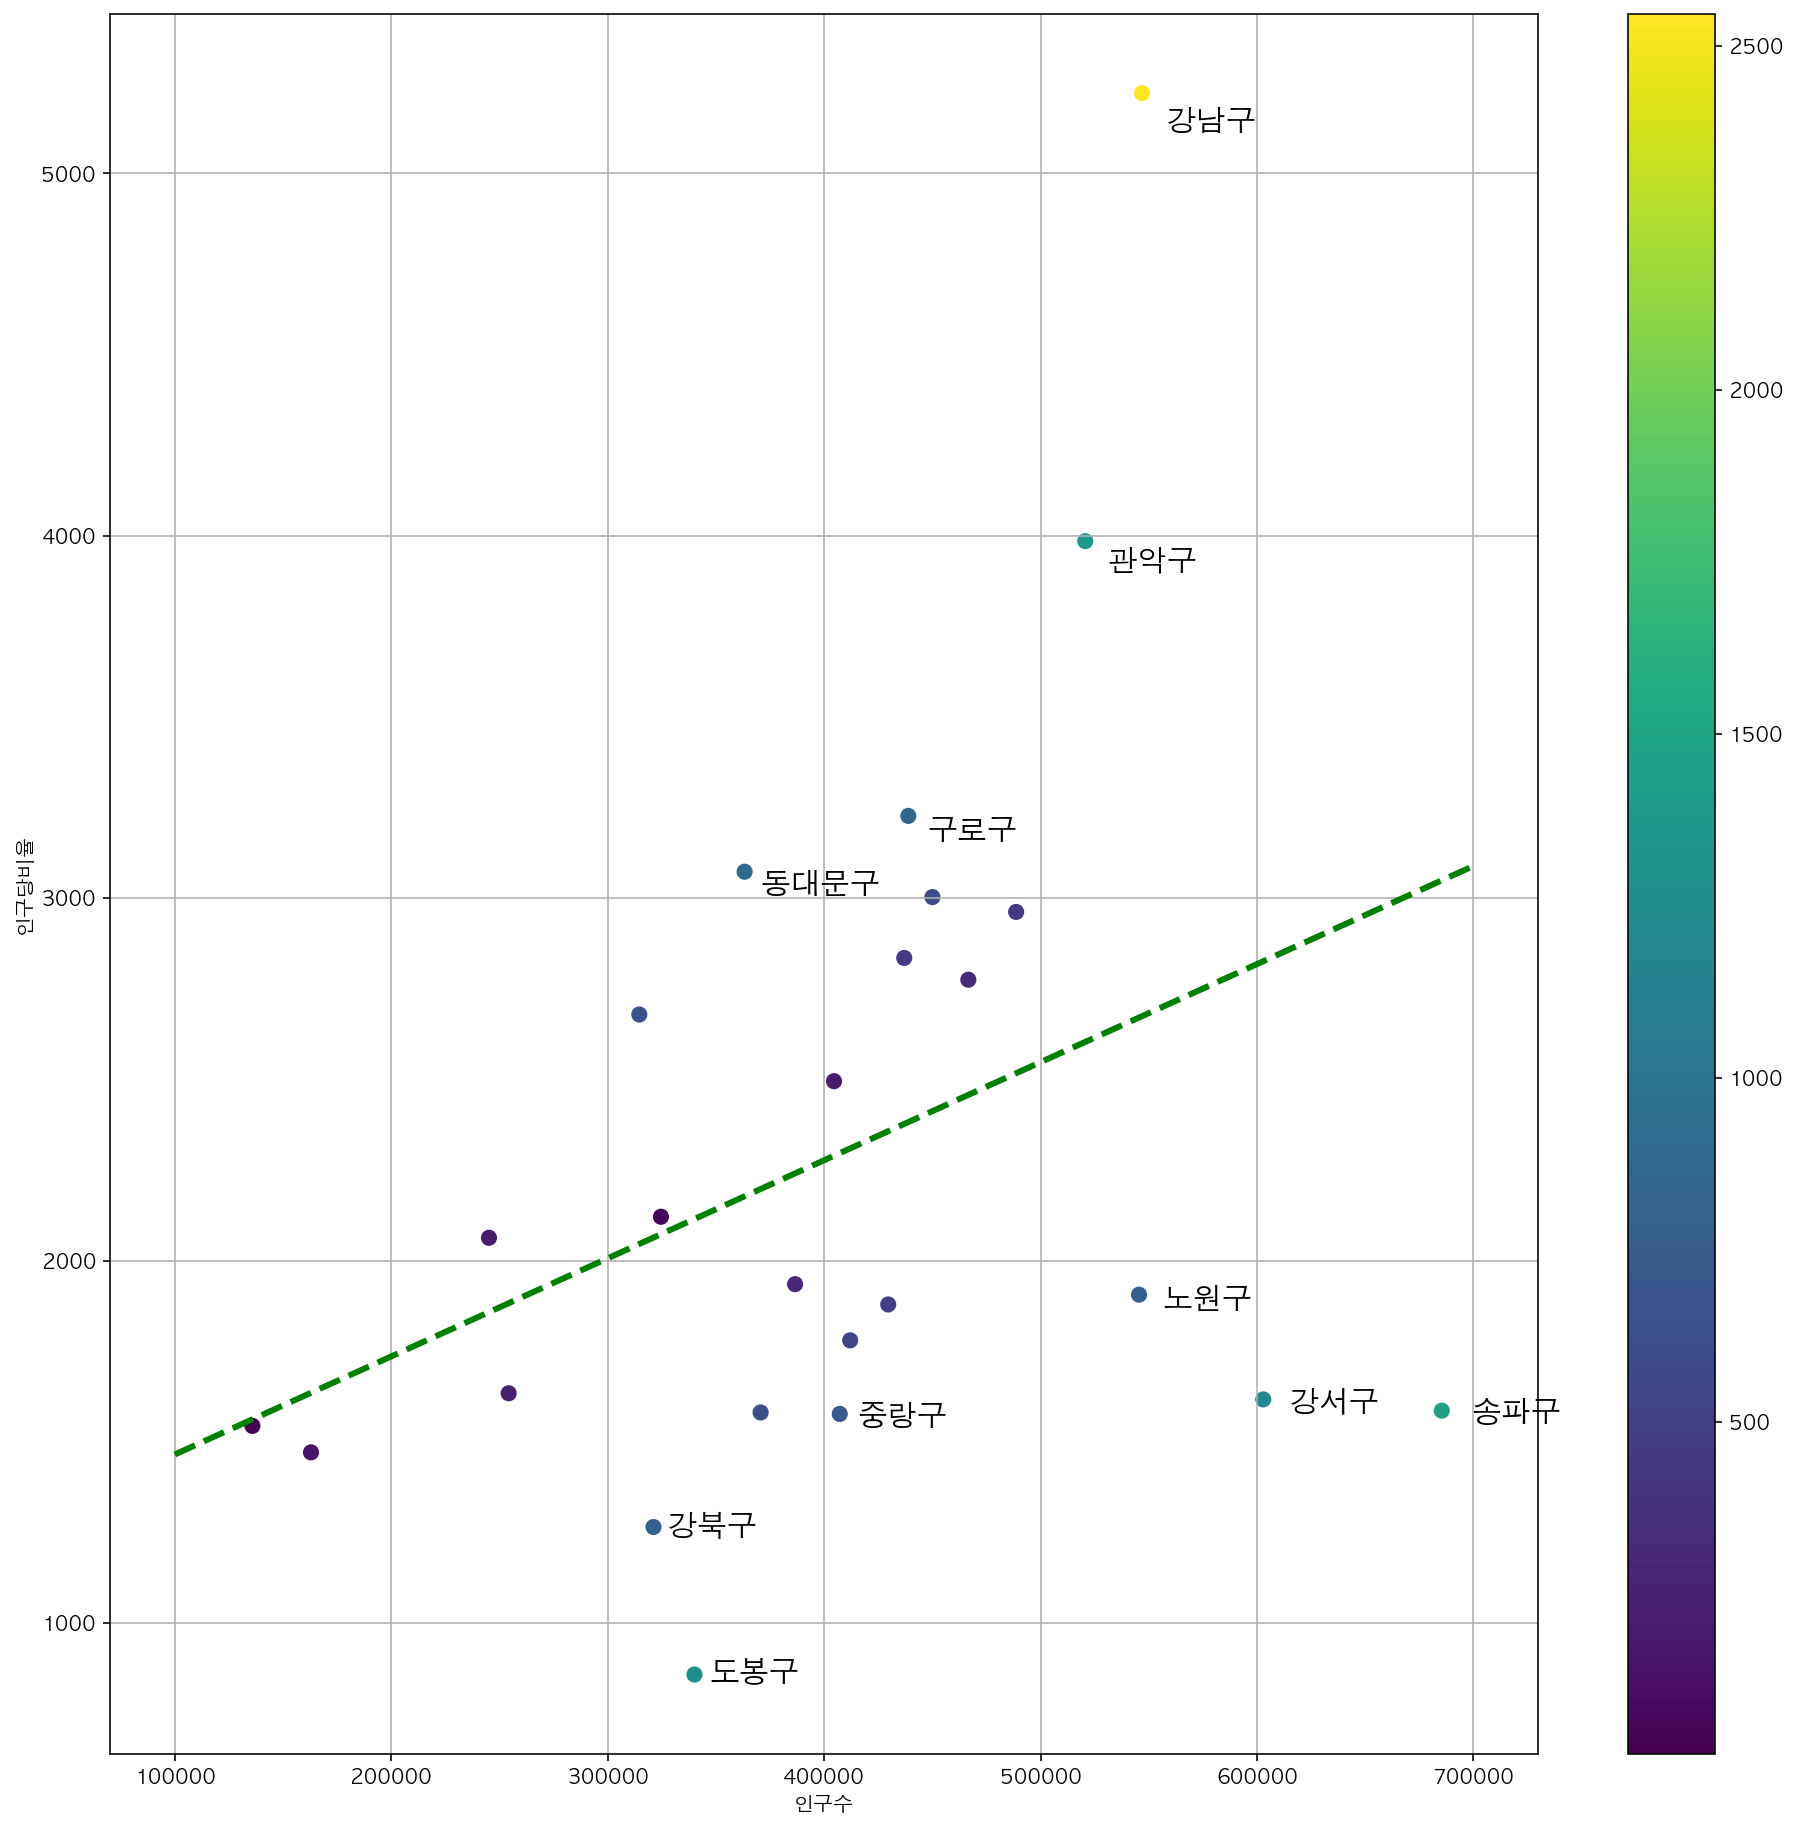

In [344]:
plt.figure(figsize=(16, 16))
plt.scatter(data_result['인구수'], data_result['소계'], c=data_result['오차'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

for n in range(10):
    plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98, df_sort.index[n], fontsize=15)

plt.xlabel('인구수')
plt.ylabel('인구당비율')

plt.colorbar()
plt.grid()
plt.show()